# PRCP-1004-FIFA 20 

Football is one of the popular sports in the world. The aim of football is to score more goals then your opponent in a 90 minute playing time frame. Each team consists of 11 players. These are made up of one goalkeeper and ten outfield players. Players must use their feet to kick the ball and are prohibited to use their hands apart from goalkeepers who can use any part of their body within the 18 yard box. All of the 11 players should acquire a few essential skills to become a professional footballer. Those skills are dribbling, passing, shooting, defending the goal, to head the ball, juggle the ball, using both their feet efficiently etc., Also, knowing the opponent team players' skill is essential to play effective football to increase the winning rate of the games. FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. EA sports data was fetched from SoFIFA, which is a database and forum. Every player in a FIFA Career Mode is included on SoFIFA’s database. It has provided data of different football players across like players' full name, age, height, weight, their position in the team, rating of their skills like dribble, goal keeping, passing, their mental strength, their ranking with respect to each player's playing position etc., using which we can cluster the players via various skills and attributes.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [2]:
data=pd.read_csv(r'C:\Users\user\Downloads\PRCP-1004-Fifa20.zip')
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


## Domain Analysis

###### 1.Name: Name of the player. 
###### 2.Age: Age of the player.
###### 3.Height: Height of the player in inches (transformed to centimeters in preprocessing).
###### 4.Overall: General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.
###### 5.Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
###### 6.PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
###### 7.WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
###### 8.WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
###### 9.Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 
###### 10.ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.
###### 11.RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
###### 12.LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
###### 13.CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
###### 14.RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
###### 15.LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
###### 16.RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
###### 17.LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
###### 18.Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
###### 19.Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
###### 20.HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.
###### 21.ShortPassing: Player’s accuracy for short passes rated between 1-99.
###### 22.LongPassing: Player’s accuracy for long passes rated between 1-99.
###### 23.Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.
###### 24.SprintSpeed: Speed rate of the player rated between 1-99.
###### 25.Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
###### 26.FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.
###### 27.BallControl: Player’s ability to control the ball rated between 1-99.
###### 28.Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.
###### 29.ShotPower: Player’s strength level of shooting the ball rated between 1-99.
###### 30.Jumping: Player’s jumping skill rated between 1-99.
###### 31.Penalties: Player’s accuracy to score goals from penalty rated between 1-99.
###### 32.Strength: Physical strength of the player rated between 1-99.
###### 33.Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99.
###### 34.Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
###### 35.Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
###### 36.Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.
###### 37.Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.
###### 38.Volleys: Player’s ability to perform volleys rated between 1-99.
###### 39.LongShots: Player’s accuracy of shoots from long distances rated between 1-99.
###### 40.Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.
###### 41.Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.
###### 42.Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.
###### 43.Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.
###### 44.StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.
###### 45.SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
###### 46.Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.  

## Basic Chacks

In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [7]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [8]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [9]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [10]:
df=data

In [11]:
rows=df.shape[0]
cols=df.shape[1]
print(f'in this dataset we have {rows} rows and {cols} cols')

in this dataset we have 18278 rows and 104 cols


## Handling the dataset
#### Setting the strategy for analysis of this dataset
#### 1.This dataset has lots of features so we need to drop some of the features that are not relevant to our goal/business case.

#### 2.We can split the dataset in numerical and categorical columns to make the data analysis faster.

#### 3.This dataset also has lots of missing values. As such we need to take care of the missing values first, so that we may get an accurate reading of our dataset

#### Here we have built a reusable function that creates a dataframe showing only the columns of the missing values and the number of missing values

In [12]:
def find_missing(dataframe):
    missing_data_cols = dataframe.columns[dataframe.isnull().sum() > 0]
    null = dataframe.isnull().sum()
    null_df = pd.DataFrame(null,columns=["No_of_null_values"])
    null_df = null_df.loc[missing_data_cols]
    if len(null_df)>0:
        return null_df
    else:
        return "There are no null values!"

## Exploring the categorical features of our dataset

In [13]:
#splitting the dataset into numerical columns
num_col=df.select_dtypes('number')

In [14]:
find_missing(num_col)

,No_of_null_values
release_clause_eur,1298
team_jersey_number,240
contract_valid_until,240
nation_jersey_number,17152
pace,2036
shooting,2036
passing,2036
dribbling,2036
defending,2036
physic,2036


### Here we see that there are number of columns that have missing values but can be imputed from other columns values.

In [15]:
# We will impute the missing values of nation_jersey_number with team_jersey_number and rename the column as jersey_number

df["nation_jersey_number"] = df["nation_jersey_number"].fillna(df["team_jersey_number"])
df = df.rename(columns={"nation_jersey_number":"jersey_number"})

# We will impute the release_clause_eur missing values with the median
df['release_clause_eur'] = df['release_clause_eur'].fillna(df['release_clause_eur'].median())


In [16]:
# Imputing missing values of features for goalkeepers from other similiar features

df["pace"] = df["pace"].fillna(df["gk_speed"])
df["shooting"] = df["shooting"].fillna(df["gk_kicking"])
df["physic"] = df["physic"].fillna(df["gk_handling"])
df["defending"] = df["defending"].fillna(df["gk_reflexes"])
df["passing"] = df["passing"].fillna(df["gk_positioning"])
df["dribbling"] = df["dribbling"].fillna(df["gk_diving"])

In [17]:
# We will drop unneccesary columns
df = df.drop(['sofifa_id','contract_valid_until','team_jersey_number','gk_diving',
             'gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

In [18]:
num_col =df.select_dtypes('number')

In [19]:
find_missing(num_col)

'There are no null values!'

In [20]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   wage_eur                    18278 non-null  int64  
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  release_clause_eur          18278 non-null  float64
 11  jersey_number               18278 non-null  float64
 12  pace                        18278 non-null  float64
 13  shooting                    182

In [21]:
num_col.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## Exploring the categorical features of our dataset

In [22]:
cat_cols=df.select_dtypes('object')

In [23]:
find_missing(cat_cols)

,No_of_null_values
player_tags,16779
team_position,240
loaned_from,17230
joined,1288
nation_position,17152
player_traits,10712
ls,2036
st,2036
rs,2036
lw,2036


#### Here we impute the null values of nation_postion feature from team_position feature

In [24]:
df['team_position'].fillna(df['nation_position'], inplace=True)

#### Lets drop unnecessary columns in categorical features

In [25]:
df = df.drop(['player_tags','loaned_from','joined','nation_position','player_traits'],axis =1)

#### There are various position names in our dataset that contains values that signifies how the overall and potential rating of the player is based on that position.

#### However there are some missing values in these position name features. Upon further inspection we find that the null values of these positions are players who are goalkeepers so they do not play in these positions; as such we have decided to fill these missing values with 0

In [26]:
positions = ["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", 
             "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", 
             "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"]

for i in positions:
    df[i] = df[i].fillna(0)

In [27]:
cat_cols=df.select_dtypes('object')
cat_cols.head()

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,...,0,0,0,0,0,0,0,0,0,0
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [28]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  team_position     18278 non-null  object
 12  ls                18278 non-null  object
 13  st                18278 non-null  object
 14  rs                18278 non-null  object
 15  lw                18278 non-null  object
 16  lf                18278 non-null  object
 17  cf          

In [29]:
find_missing(cat_cols)

'There are no null values!'

In [30]:
cat_cols.describe()

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,99,99,99,99,99,97,111,111,111,97
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,0,0,0,0,0,0,0,0,0,0
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,2036,2036,2036,2036,2036,2036,2036,2036,2036,2036


# Task 2:- Explore football skills and cluster football players based on their attributes.
## Exploratory Data Analysis
### Univatiate Analysis
#### Visualizing the numerical columns

In [31]:
num_col.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


## Visualizing the distribution of ages of players in our dataset

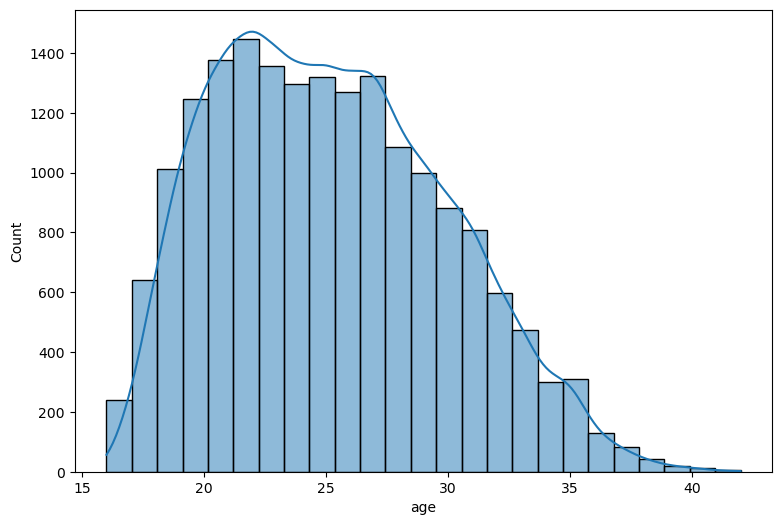

In [32]:
plt.figure(figsize = (9,6))
sns.histplot(df['age'],bins =25,kde =True);

#### Our insights:

##### 1.Here we see that the age column in our dataset is slightly skewed towards the right.

##### 2.Also we observe that most of the players in our dataset in between the ages of 20 - 27.

### Visualizing the distribution of common features of players

In [33]:
cols = ['height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'skill_moves']

In [34]:
# create a new dataframe with only the selected columns
df_selected = df[cols]

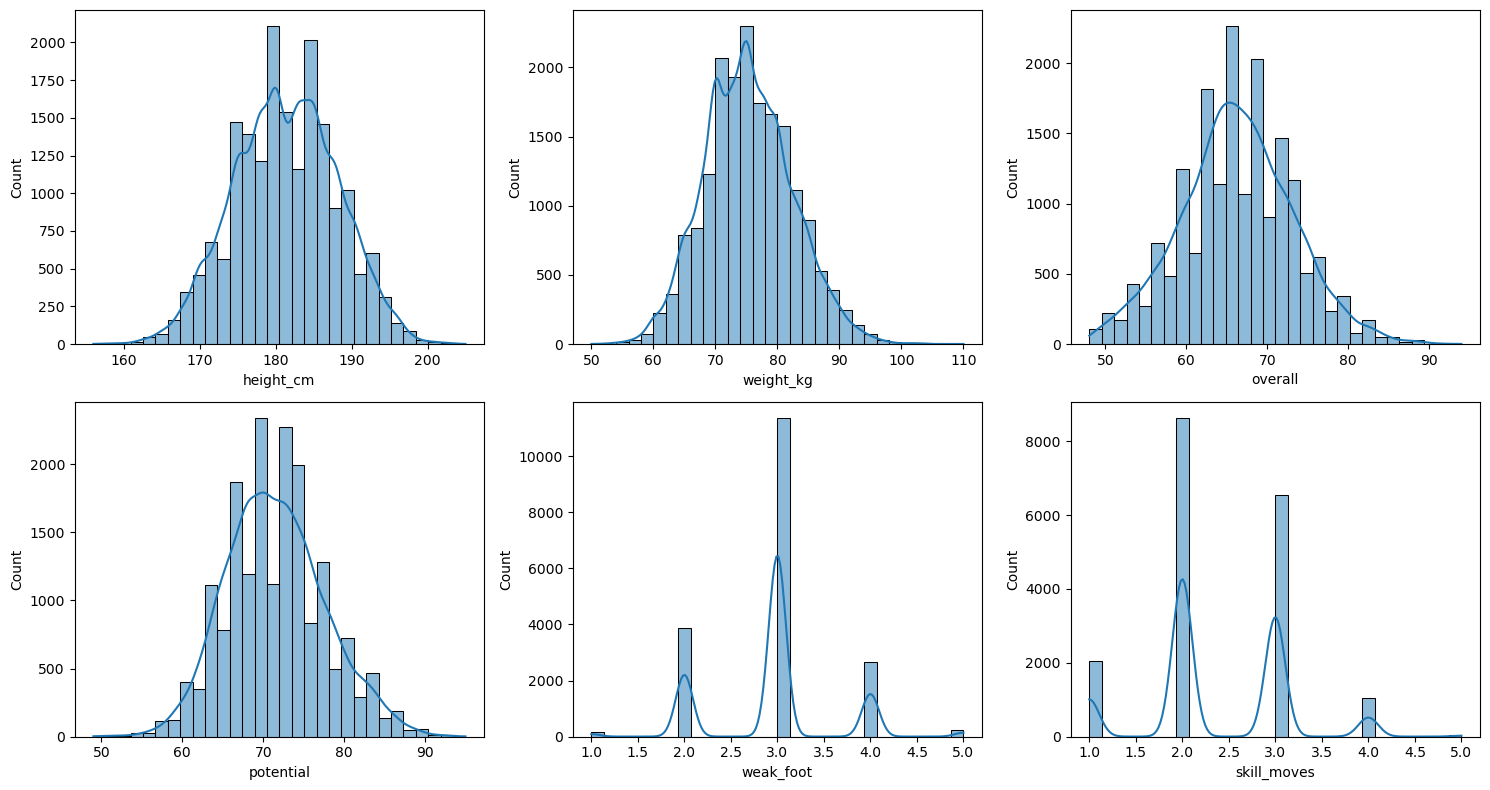

In [35]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col, bins=30, ax=axs[i],kde =True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Our insights:

#### 1.The 'height_cm', 'weight_kg', 'overall','potential' columns are having very little skew and looking more or less normally distributed.

#### 2.The 'weak_foot' and 'skill_moves' columns are categories that signifies a players ratings in that category. We see that most players have ratings 3 and 2 in weak_foot and skill_moves respectively.

## Visualizing the distribution of income of players

In [36]:
cols = ['value_eur','wage_eur','release_clause_eur']

In [37]:
# create a new dataframe with only the selected columns
df_selected = df[cols]

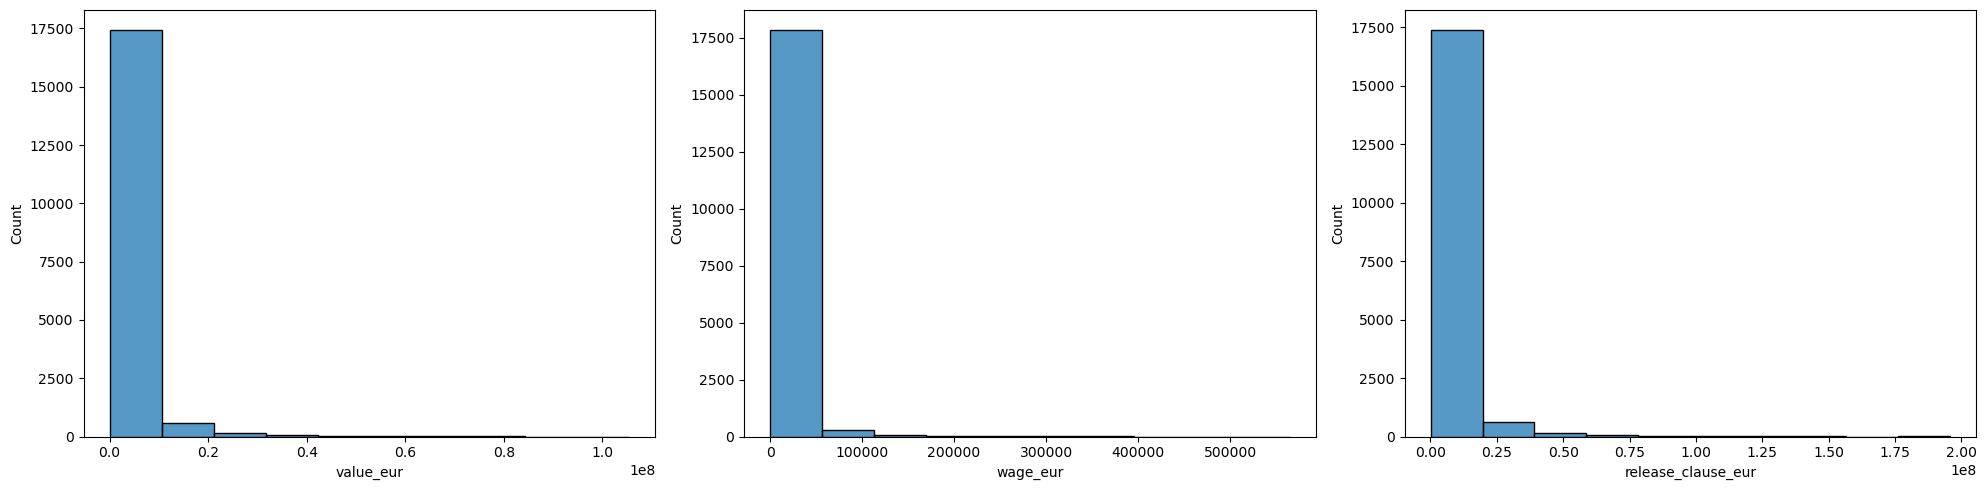

In [38]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col,bins = 10, ax=axs[i])
    axs[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

### Our insights:

#### 1.Here we see that the all these features are right skewed.

#### 2.Most of the players in our dataset are earning (wage_eur) between 0 to 90000

## Visualizing the distribution of skills of players

In [39]:
skills_cols = num_col.iloc[:, 12:]

skills = skills_cols.columns.tolist()

df_selected = df[skills]

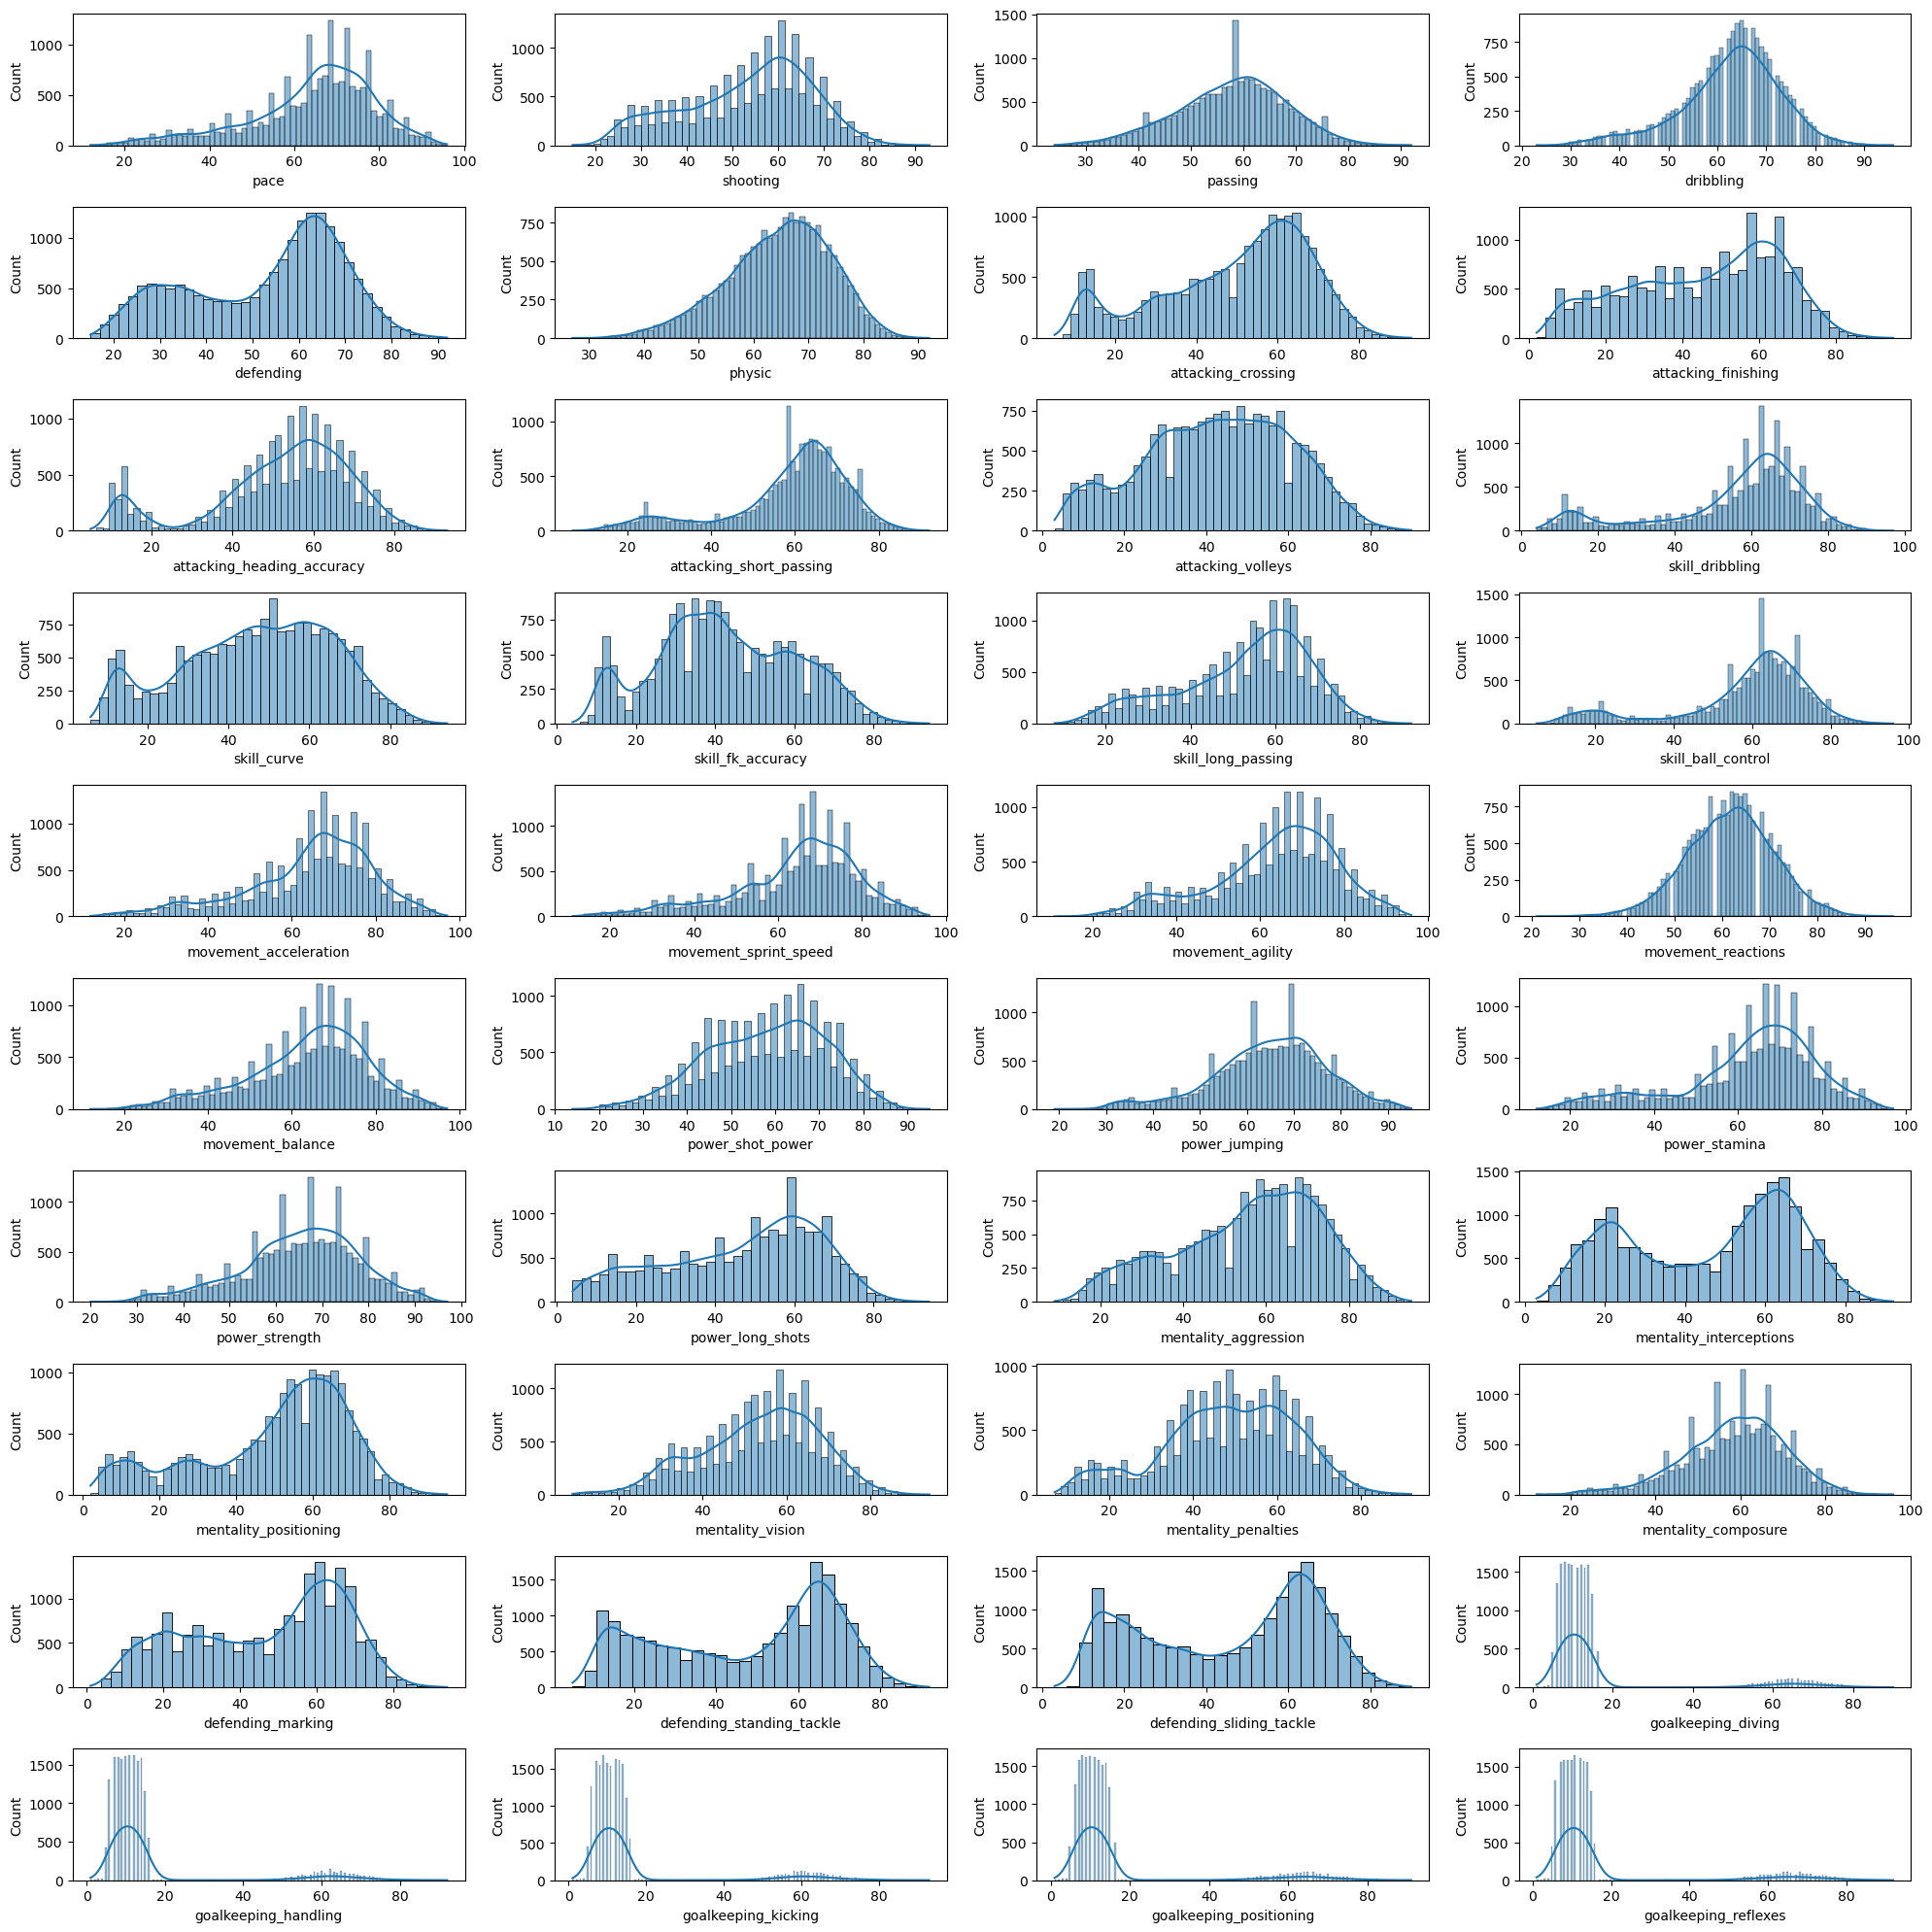

In [40]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col, ax=axs[i], kde=True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Our insights:

#### 1.pace,shooting,passing,dribbling,physic,gk_diving, gk_handling,gk_positioning,gk_kicking,gk_reflexes, gk_speed, attacking_heading_accuracy, nation_jersy_number, attacking_volleys, skill_curve, skill_fk_accuracy, movement_reactions, movement_balance, power_shot_power, power_jumping, power_strenght, mentality_aggression, mentality_interception, mentality_vision, mentality_penalties, mentality_composure, these are the columns in dataset having slightly skewed distribution.

#### 2.goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes these are the columns in the dataset having right skewed distribution.

#### 3.defending, attacking_crossing, attacking_finishing, attacking_shot_passing, skill_dribbling, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility,power_stamina, power_long_shot, mentality_positioning, defending_marking, defending_standing_tackle, defending_sliding_tackle these are the columns in the dataset having left skewed distribution.

# Visualizing the categorical columns

In [41]:
cat_cols.head()

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,...,0,0,0,0,0,0,0,0,0,0
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [42]:
uni_cat_col1 = df[['preferred_foot','work_rate','body_type','real_face']]
uni_cat_col = uni_cat_col1[(uni_cat_col1['body_type']=='Normal')|(uni_cat_col1['body_type']=='Lean')|(uni_cat_col1['body_type']=='Stocky')]
uni_cat_col.head(3)

,preferred_foot,work_rate,body_type,real_face
3,Right,Medium/Medium,Normal,Yes
4,Right,High/Medium,Normal,Yes
5,Right,High/High,Normal,Yes


In [43]:
uni_cat_col1 = uni_cat_col.columns.to_list()

df_selected = uni_cat_col[uni_cat_col1]

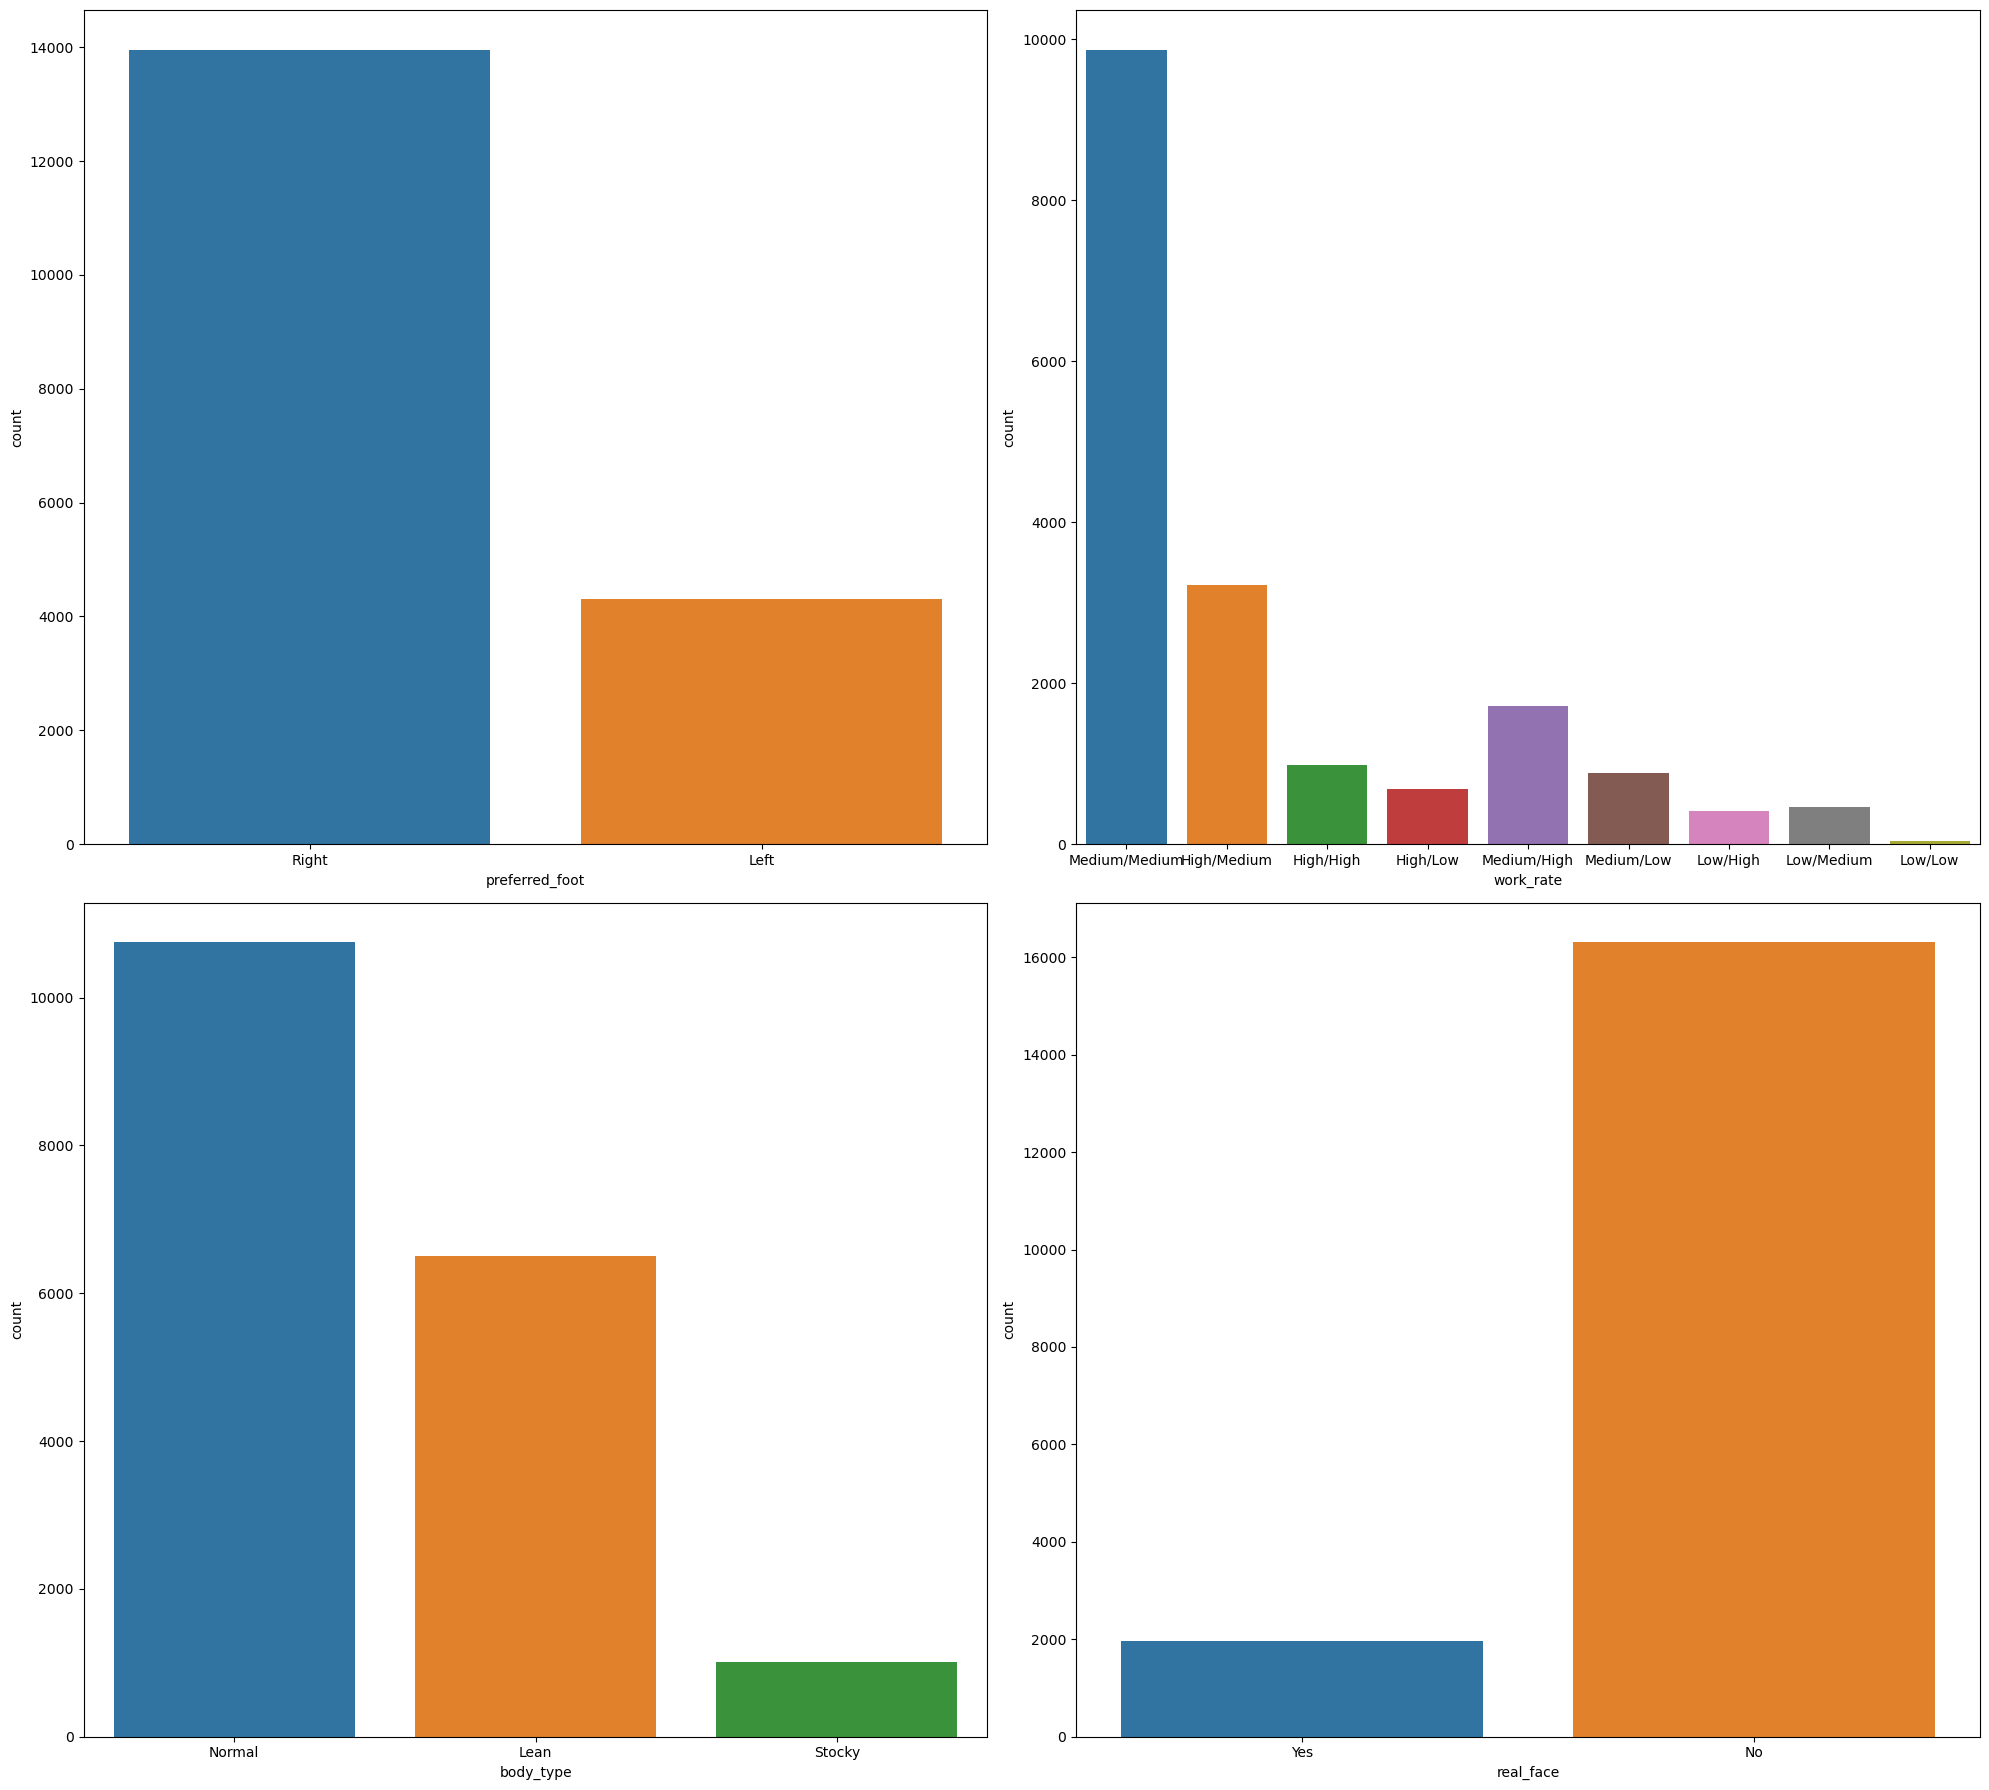

In [44]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axs = axs.flatten()

# plot countplot for each feature
for i, col in enumerate(df_selected.columns):
    sns.countplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Our insights:

#### 1.Most of the players in our dataseet are right footed

#### 2.Work_Rate of Medium/Medium has the highest number of observation amoung players in our dataset

#### 3.Most of the players have a normal body type.

#### 4.Real Face having 'NO' values the most.

## Bivariate Analysis
### Finding top 10 players in our dataset

In [45]:
top_ten = df.sort_values(by = 'overall', ascending=False)[:10]
ranking = [i for i in range(1, 11)]
player_names = top_ten['short_name'].values.tolist()

In [46]:
top_10_players = pd.DataFrame({'Ranking': ranking, 'Player': player_names})

top_10_players = top_10_players.set_index('Player')
top_10_players

,Ranking
Player,
L. Messi,1
Cristiano Ronaldo,2
Neymar Jr,3
J. Oblak,4
E. Hazard,5
K. De Bruyne,6
M. ter Stegen,7
V. van Dijk,8
L. Modrić,9


## Visualizing the top 10 players with most overall rating and potential rating

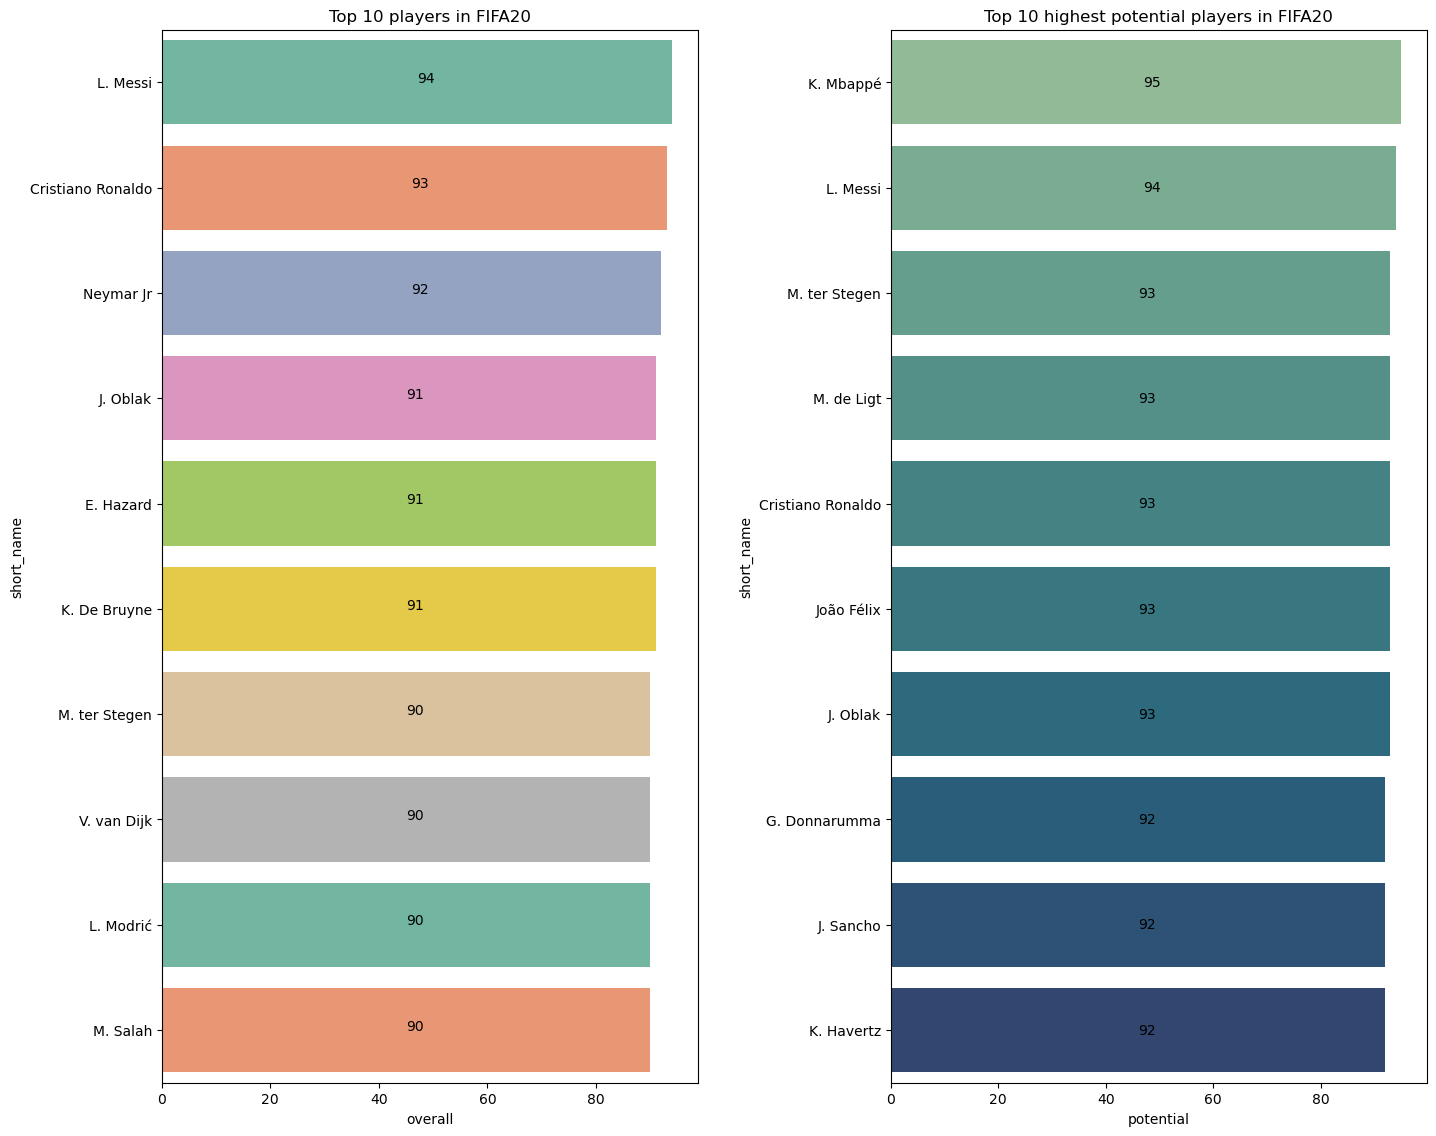

In [47]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_players = df[['short_name', 'overall']][:10]
plt.title("Top 10 players in FIFA20")
sns.barplot(y = top_players.short_name, x = top_players.overall, palette="Set2")
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)
def plot_top20(dataframe, metric):
    metric_df = data[['short_name', metric]].sort_values(by = [metric], ascending = False)[:10]
    plt.title(f"Top 10 highest {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_top20(data, 'potential')

plt.tight_layout(pad=3.0)

### Our Insights:

#### 1.Here we see that Leonel Messi and Cristiano Ronaldo has the highest overall rating.

#### 2.On the other hand, Mbappe and Messi are the highest potential rated players

## Visualizing the bottom 10 players with least overall rating and potential rating

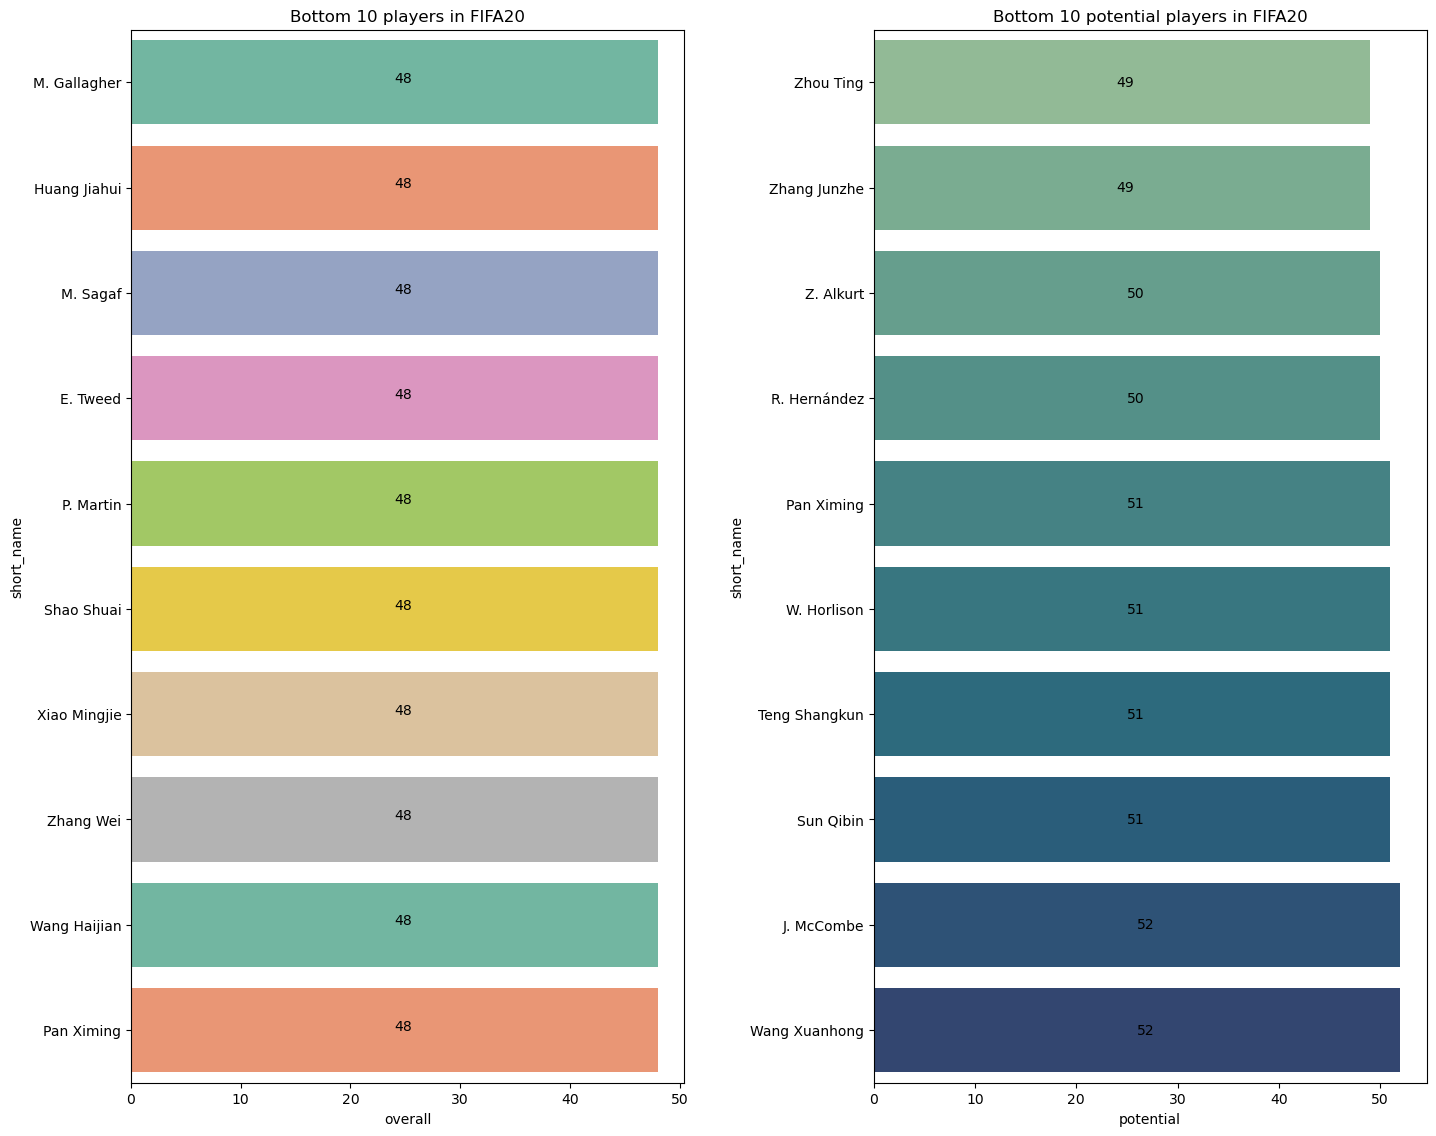

In [48]:
plt.figure(figsize=(15,12))
plt.subplot(121)
low_players = data[['short_name', 'overall']][-10:]
plt.title("Bottom 10 players in FIFA20")
sns.barplot(y = low_players.short_name, x = low_players.overall, palette="Set2")
for index, value in enumerate(low_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)
def plot_last20(dataframe, metric):
    metric_df = data[['short_name', metric]].sort_values(by = [metric], ascending = True)[:10]
    plt.title(f"Bottom 10 {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_last20(data, 'potential')

plt.tight_layout(pad=3.0)

### Our Insights:

#### 1.Bottom 43 players are having the lowest overall rating of 48.

#### 2.Zhou Ting and Zhang Junzhe are having the lowest potential rating of 49.

## Finding which nation are producing the top ten players

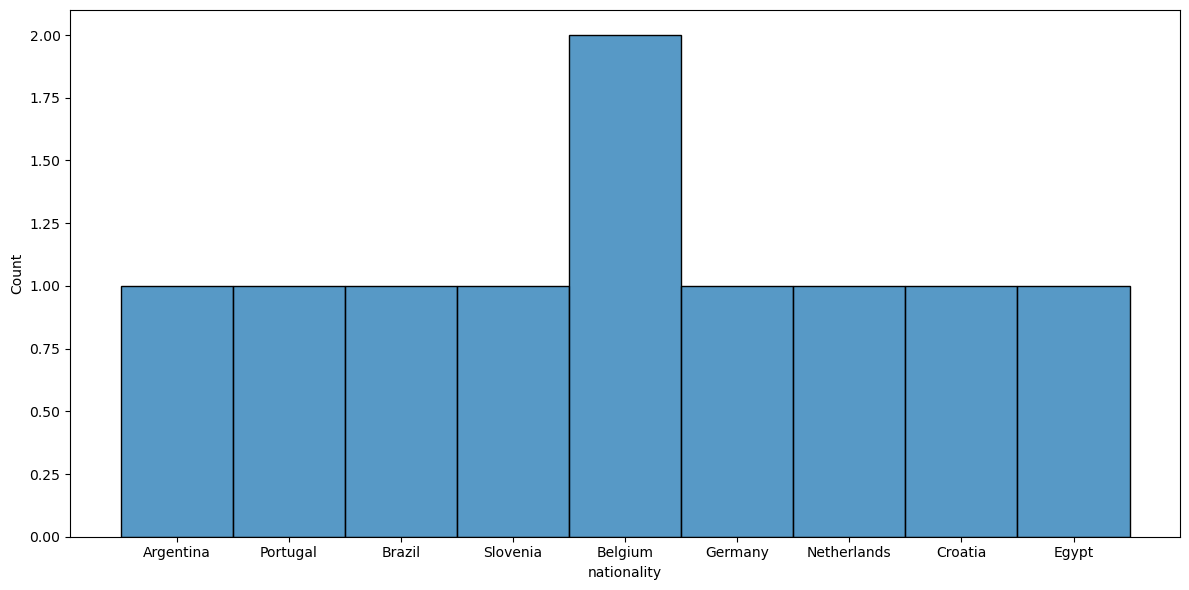

In [49]:
plt.figure(figsize = (12,6))
sns.histplot(top_ten['nationality'])

plt.tight_layout()

### Our Insights:

#### 1.We see that Belgium is producing two players in our top ten players dataset

## Finding out the income of our top ten players

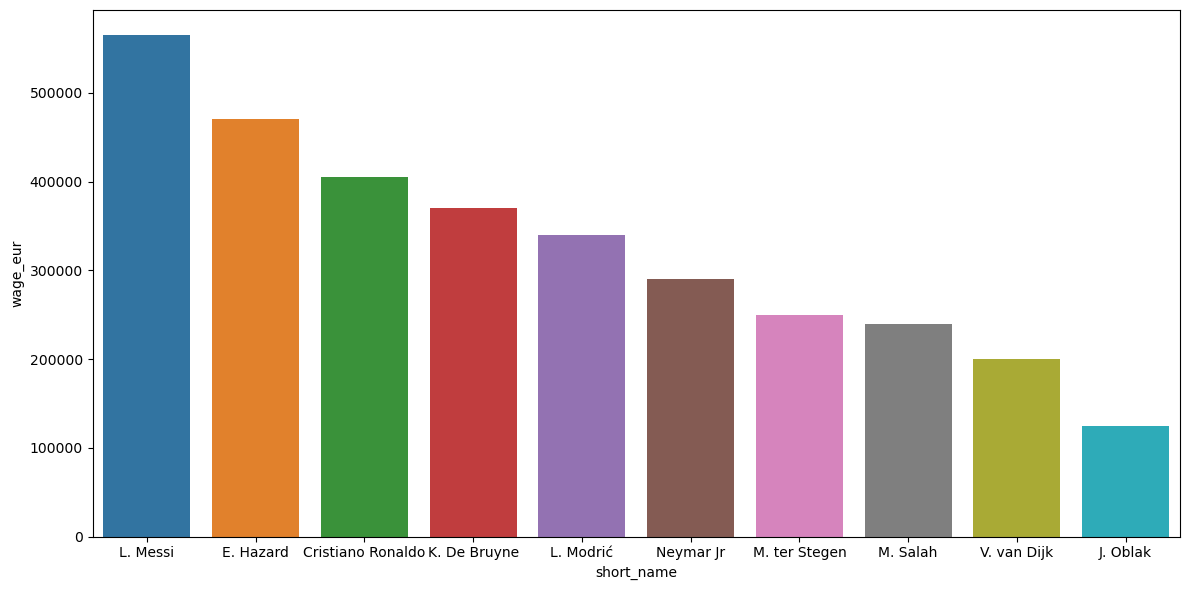

In [50]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='wage_eur',ascending=False),x = 'short_name',y = 'wage_eur')
plt.tight_layout()

### Our Insights:

#### 1.Here we see that Lionel Messi is getting paid the most.

## Finding the shooting capabilities of our top ten players

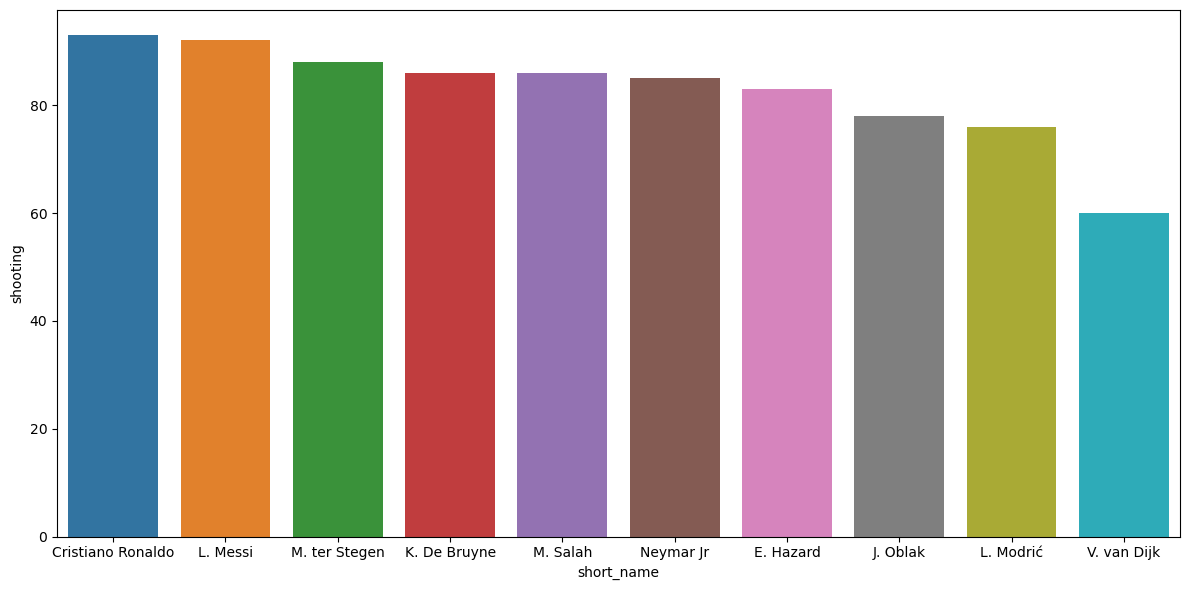

In [51]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='shooting',ascending=False),x = 'short_name',y = 'shooting')
plt.tight_layout()

### Our Insights:

#### 1.Here we see that unsuprizingly Cristiano Ronaldo has the top rating for shooting capabilities

## Finding the dribbling capabilities of our top ten players

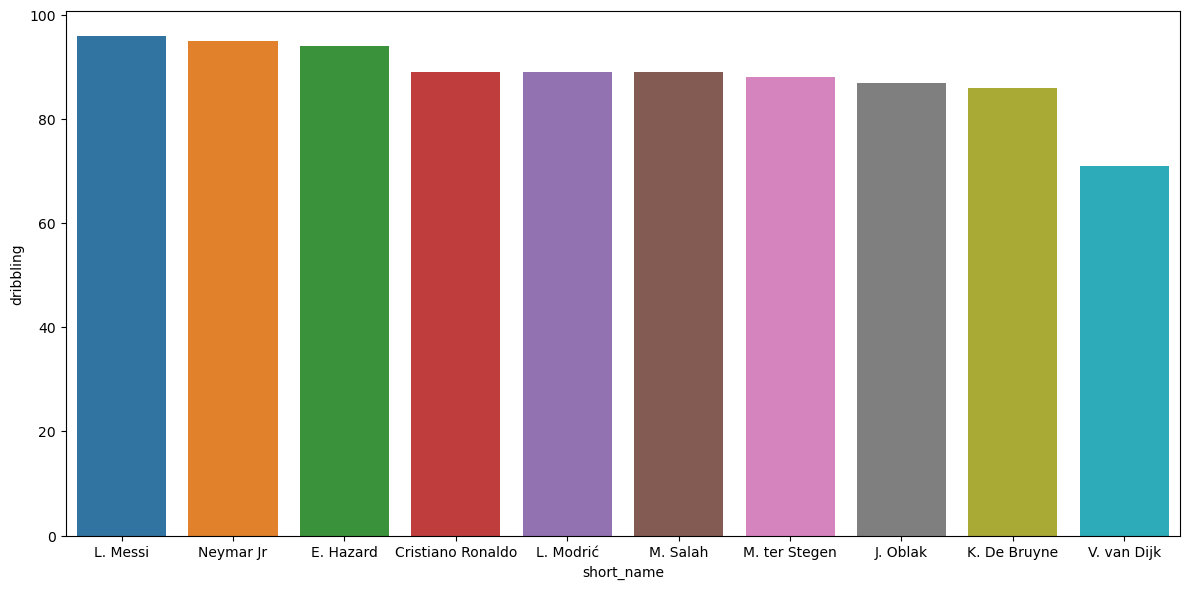

In [52]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='dribbling',ascending=False),x = 'short_name',y = 'dribbling')
plt.tight_layout()

### Our Insights:

#### 1.Here we see that Lionel Messi has the top rating for dribbling capabilities

## Finding the attacking finishing capabilities of our top ten players

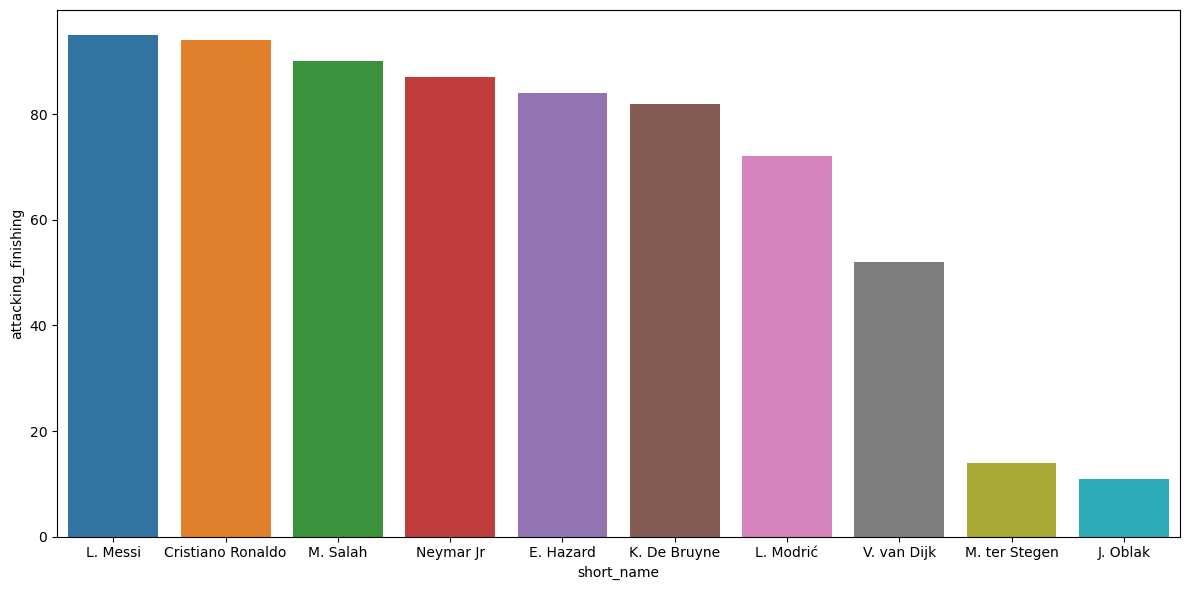

In [53]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='attacking_finishing',ascending=False),x = 'short_name',y = 'attacking_finishing')
plt.tight_layout()

### Our Insights:

#### 1.Here we see that Lionel Messi has the top rating for attacking finishing capabilities

## Finding the highest paid offensive players

In [54]:
fifa_df = df
fifa_df = fifa_df.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
def find_most_earnings_player(position):
    forwards_df = fifa_df[(df["team_position"] == 'LW') | (fifa_df["team_position"] == 'RW')| (fifa_df["team_position"] == 'ST')]
    name = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][2]
    wage = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][12]
    if position == 'LW':
        position = 'left winger'
    elif position == 'ST':
        position = 'striker'
    else:
        position = 'right winger'
    print(f'{name} is highest paid {position} with a wage of {wage} euros')

In [55]:
find_most_earnings_player('LW')

Eden Hazard is highest paid left winger with a wage of 470000 euros


In [56]:
find_most_earnings_player('RW')

Lionel Andrés Messi Cuccittini is highest paid right winger with a wage of 565000 euros


In [57]:
find_most_earnings_player('ST')

Luis Alberto Suárez Díaz is highest paid striker with a wage of 355000 euros


## Finding the potential of the players with respect to their age.

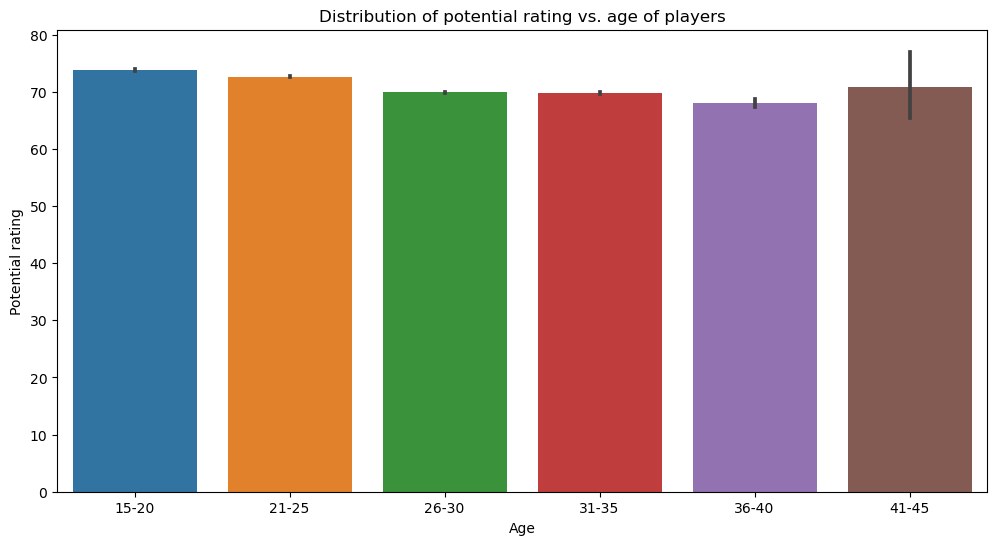

In [58]:
plt.figure(figsize = (12,6))
sns.barplot(data=fifa_df,x="Age Group",y="potential")
plt.xlabel("Age")
plt.ylabel("Potential rating")
plt.title("Distribution of potential rating vs. age of players")
plt.show()

### Our Insights:

#### 1.Here we may conclude that the more the aged the player become the more they lose their potential.

## Finding the relationship between overall & potential rating of the player with respect to how much they earn

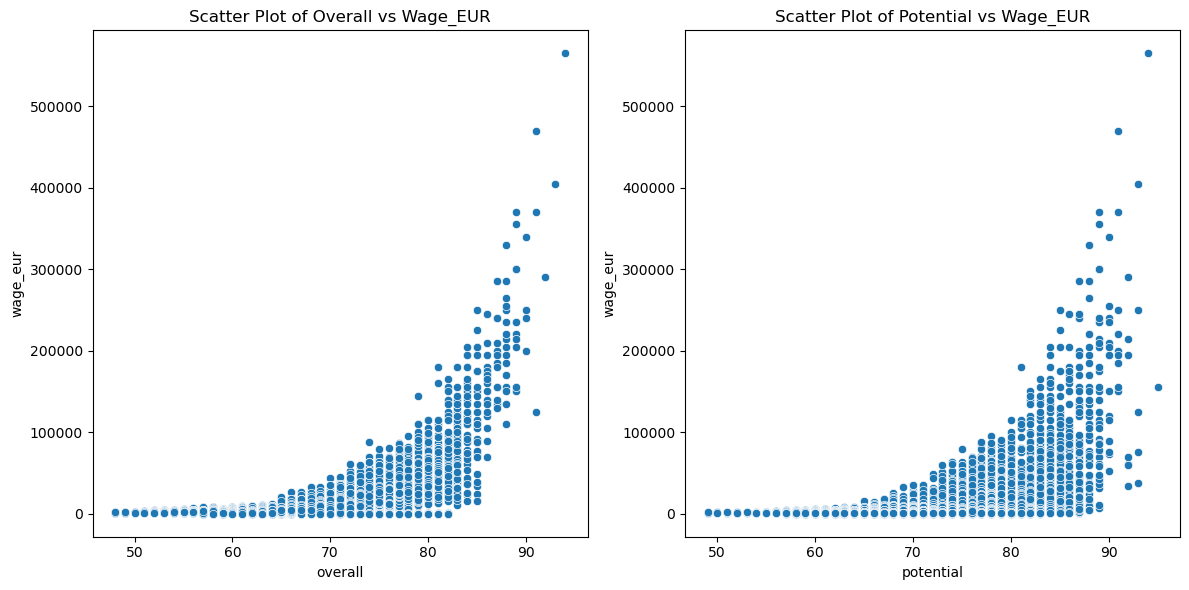

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data =df,x = 'overall', y = 'wage_eur', ax=ax1)
ax1.set_title("Scatter Plot of Overall vs Wage_EUR")

sns.scatterplot(data =df,x = 'potential', y = 'wage_eur', ax=ax2)
ax2.set_title("Scatter Plot of Potential vs Wage_EUR")
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

### Our Insights:

#### 1.Here we see that there exists a positive correlation between overall/potential rating with respect to players income

## Finding the top 10 clubs and top 10 coutries with respect to overall ratings of the players

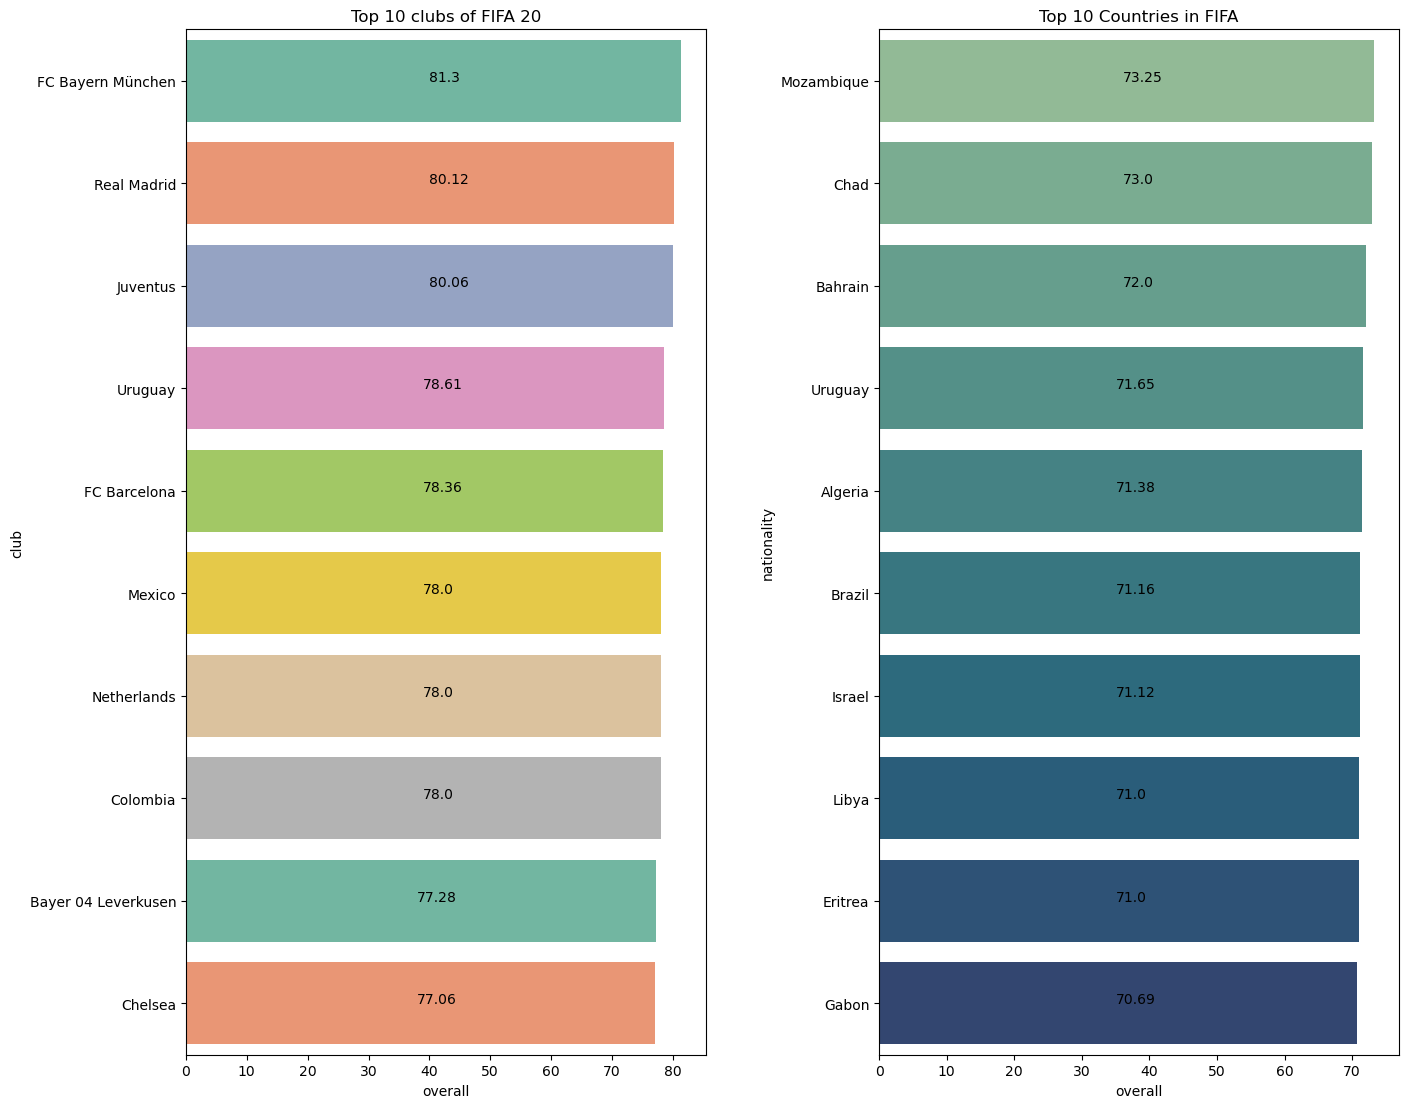

In [60]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_club=data.groupby(['club']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 clubs of FIFA 20')
sns.barplot(x=top_club,y=top_club.index,palette='Set2')
for index,value in enumerate(top_club):
    plt.text(value//2, index, str(round(value,2)))

plt.subplot(122)

top_country=data.groupby(['nationality']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 Countries in FIFA')
sns.barplot(y=top_country.index,x=top_country,palette='crest')
for index, value in enumerate(top_country):
    plt.text(value//2,index,str(round(value,2)))


plt.tight_layout(pad=4.0)

### Our Insights:

#### 1.FC bayern munchen is the top football club in the world with overall avg rating with 81.3.

#### 2.Mozombique is the top country with avg overall rating of players with 73.25.

## Visualizing the relationship of a players' international reputation vs their overall rating

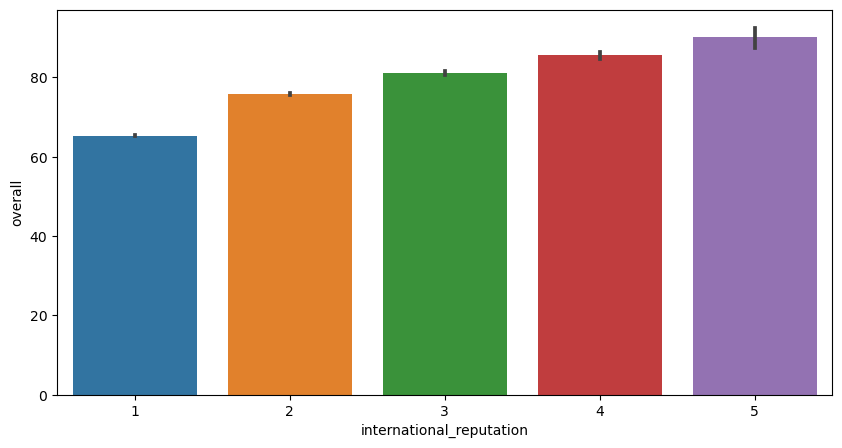

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='international_reputation',y='overall')
plt.show()

In [62]:
IR=data.groupby(['international_reputation']).overall.mean()
IR

international_reputation
1    65.273133
2    75.835965
3    81.157534
4    85.586957
5    90.166667
Name: overall, dtype: float64

### Our Insights:

#### 1.The players having 5 international_reputation will have overall rating on an avg of 90.166

#### 2.The players having 1 international_reputation will have overall rating on an avg of 65.27

## Visualizing the relationship of a players preferred foot vs their overall rating

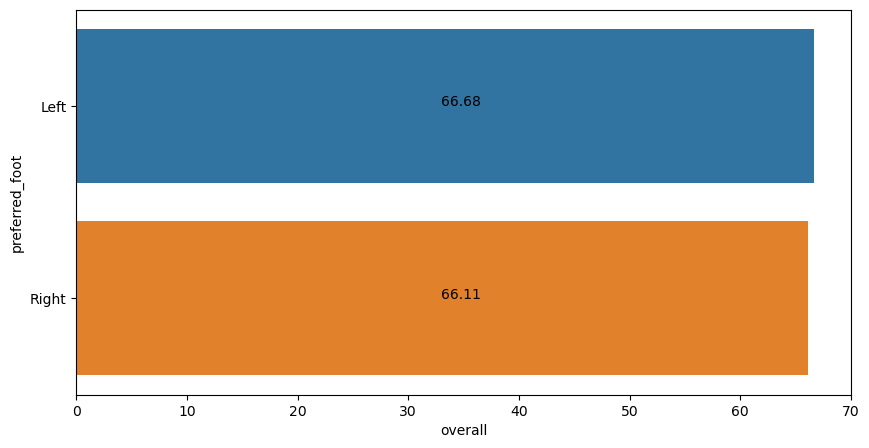

In [63]:
plt.figure(figsize=(10,5))
pf=data.groupby(['preferred_foot']).overall.mean()
sns.barplot(x=pf,y=pf.index)
for index,value in enumerate(pf):
    plt.text(value//2, index,str(round(value,2)))
plt.show()

### Our Insights:

#### 1.Left footed players have the average overall of 66.68, whereas right footed players have the average overall of 66.11.

## Comparing Lionel Messi and Cristiano Ronaldo capabilities

In [64]:
messi_ronaldo_df = df[(df['short_name']=='L. Messi') | (df['short_name']=='Cristiano Ronaldo')]
messi_ronaldo_df

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


## Visualizing the capabilities of Messi & Ronaldo

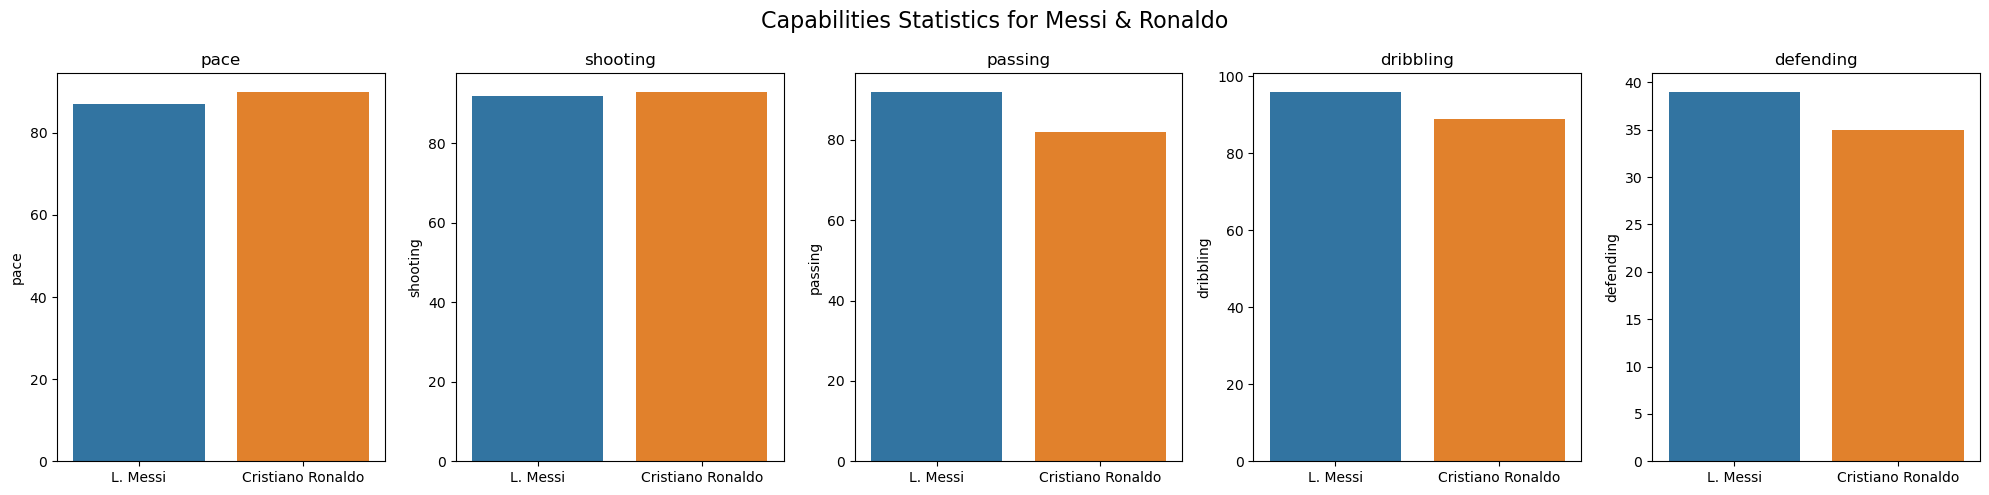

In [65]:
capabilities = ['pace', 'shooting', 'passing', 'dribbling', 'defending']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, capability in enumerate(capabilities):
    sns.barplot(data = messi_ronaldo_df, x = messi_ronaldo_df['short_name'], y = messi_ronaldo_df[capability], ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(capability)
    ax[i].set_title(capability)
plt.suptitle("Capabilities Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

### Our Insights:

#### 1.In the general capabilities section we see that Messi and Ronaldo are both performing exceptionally well

## Visualizing the attacking capabilities of Messi & Ronaldo

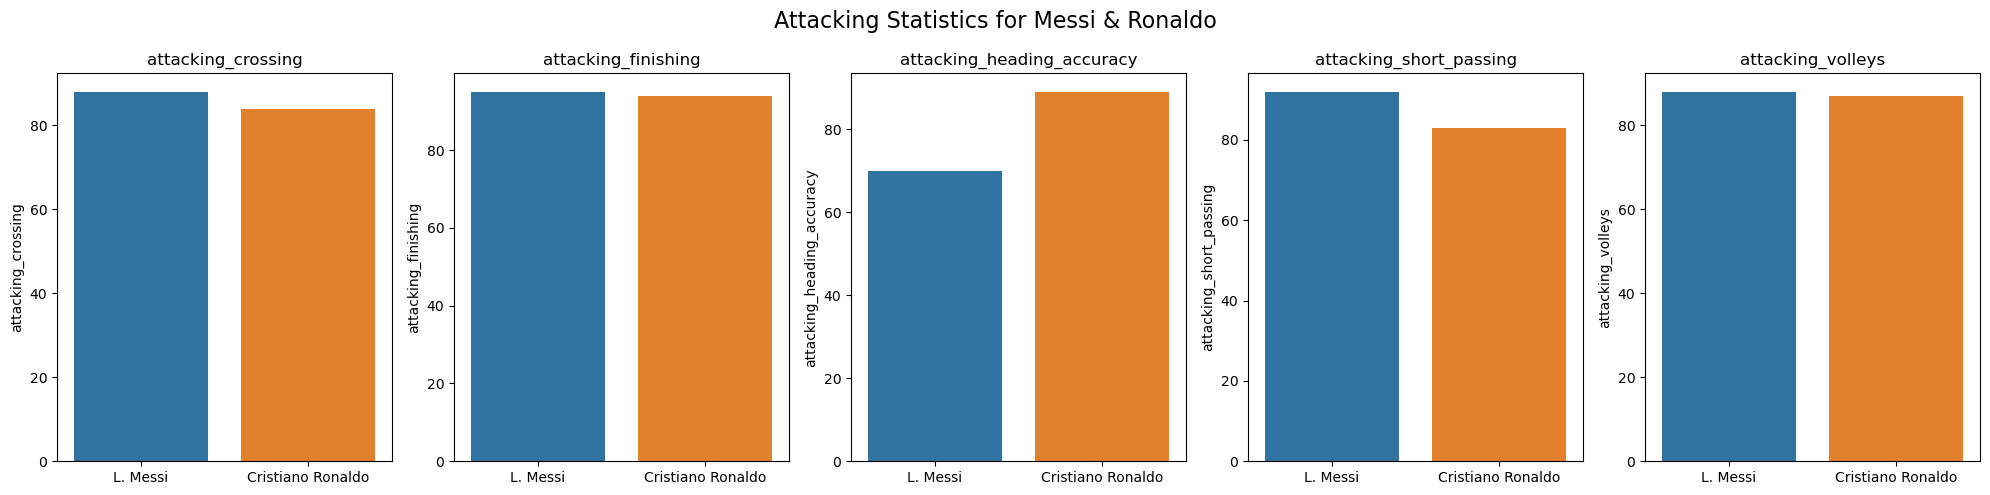

In [66]:
attacking_stats = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                   'attacking_short_passing','attacking_volleys']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(attacking_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Attacking Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

### Our Insights:

#### 1.In the attacking capabilities section we see that Ronaldo is leading Messi in heading accuracy and Messi is better at crossing than Ronaldo

## Visualizing the skills of Messi & Ronaldo

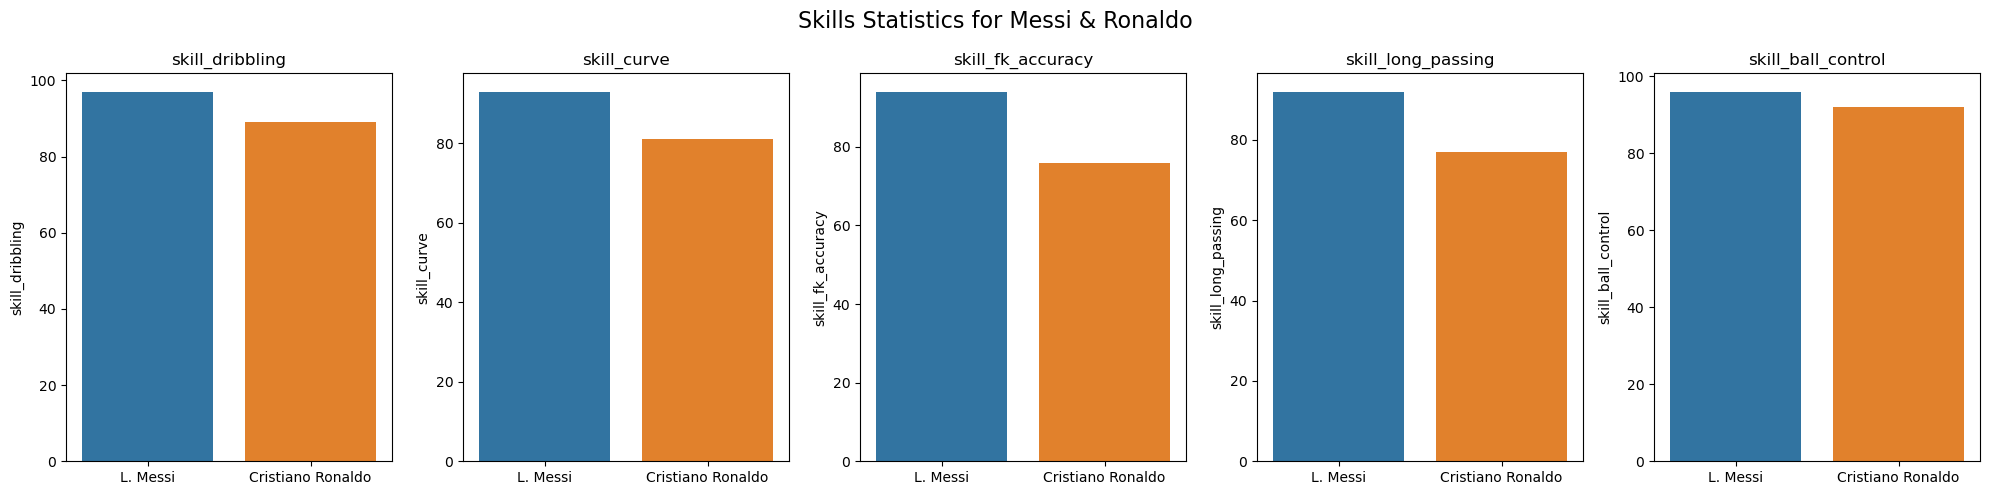

In [67]:
skill_stats = ['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(skill_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Skills Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

### Our Insights:

#### 1.In the skills section we see that Messi leads Ronaldo in almost all departments

## Visualizing the power capabilities of Messi & Ronaldo

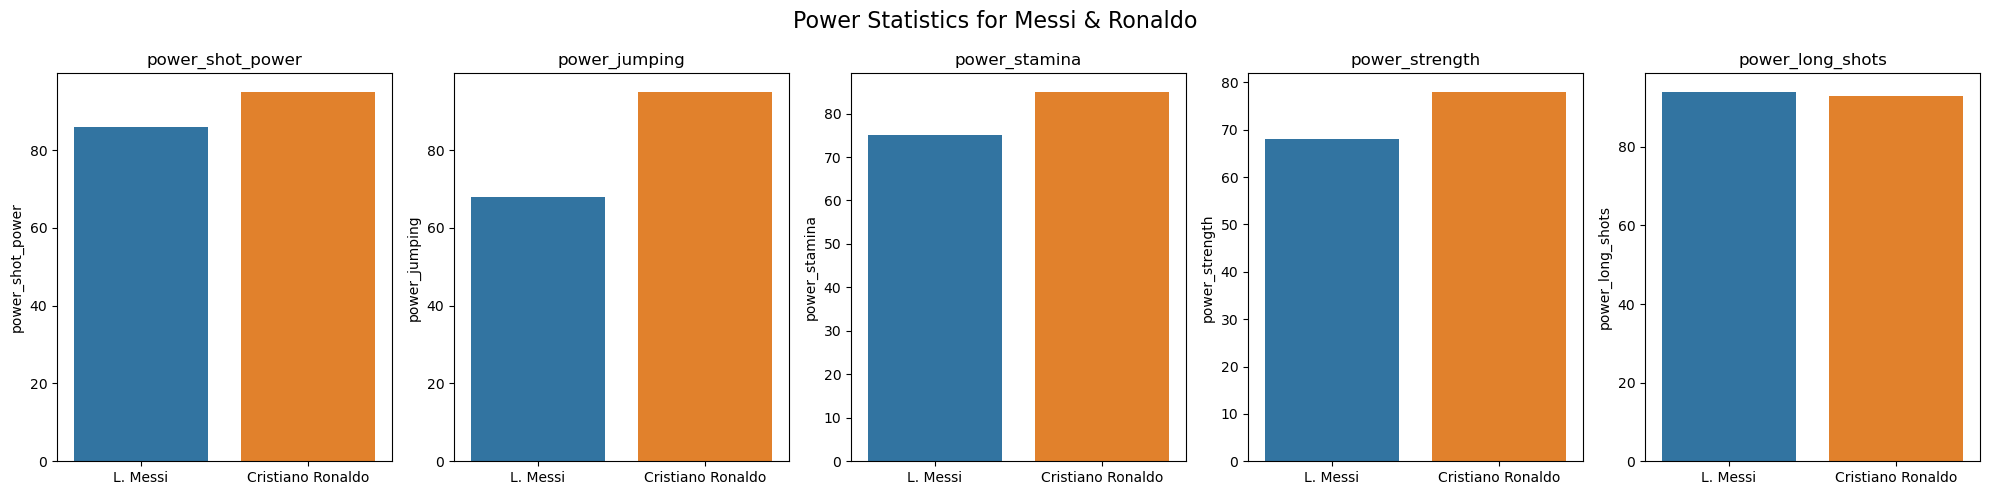

In [68]:
power_stats = ['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(power_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Power Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

### Our Insights:

#### 1.In the power capabilities section we see that Ronaldo is leading Messi in most departments

## Finding the important features in our dataset
### Numerical Columns important features

In [69]:
num_col.head(2)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11


In [70]:
imp_feats = num_col.corr()["overall"].sort_values()[40:-1].index.tolist()
imp_feat_df = df[imp_feats]
num_imp_feat_df = pd.concat([imp_feat_df,df['overall']],axis =1)
num_imp_feat_df.head(3)

,mentality_vision,physic,power_shot_power,wage_eur,release_clause_eur,dribbling,value_eur,potential,passing,mentality_composure,movement_reactions,overall
0,94,66.0,86,565000,195800000.0,96.0,95500000,94,92.0,96,95,94
1,82,78.0,95,405000,96500000.0,89.0,58500000,93,82.0,95,96,93
2,90,58.0,80,290000,195200000.0,95.0,105500000,92,87.0,94,92,92


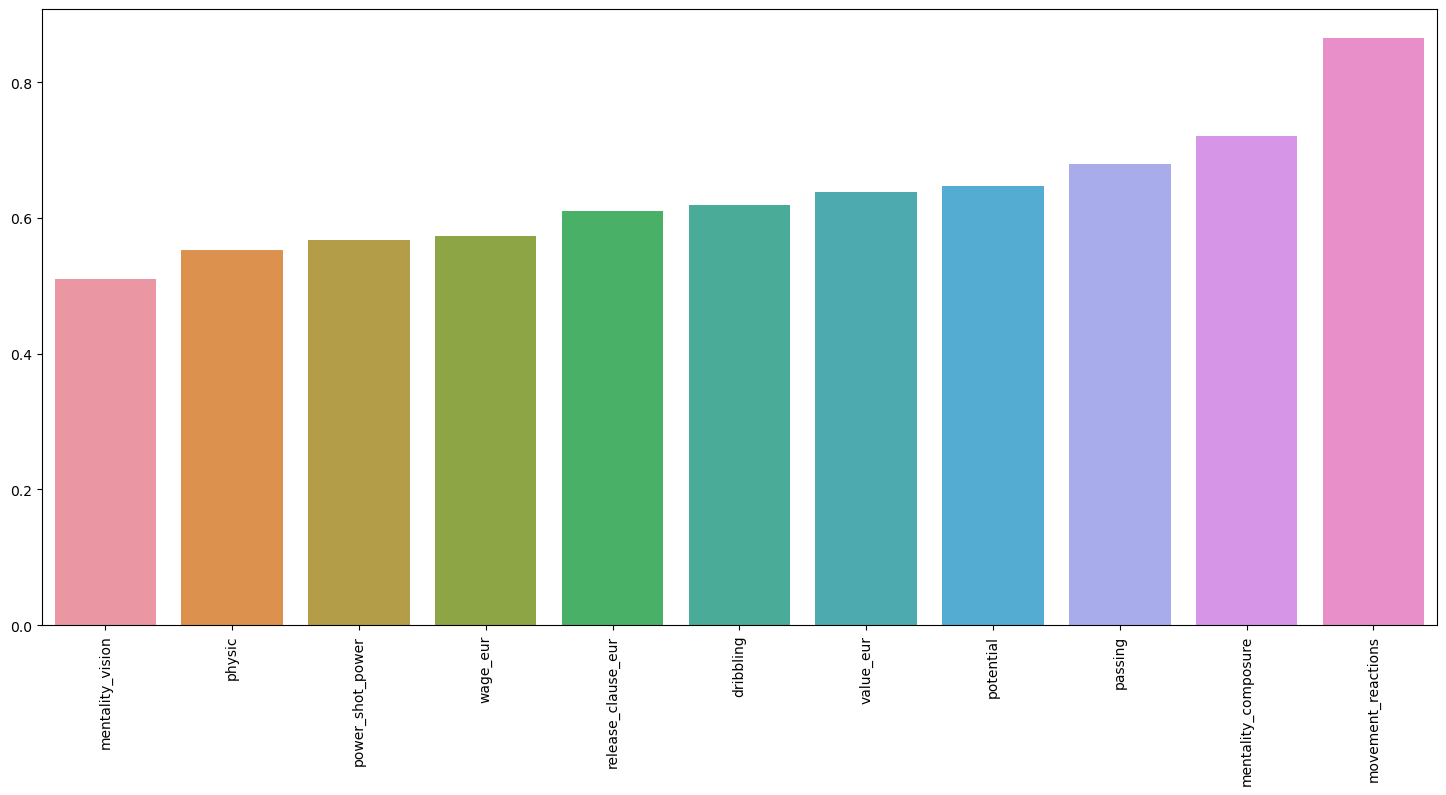

In [71]:
plt.figure(figsize=(18,8))
sns.barplot(x= num_col.corr()["overall"].sort_values()[40:-1].index,y = num_col.corr()["overall"].sort_values()[40:-1].values)
plt.xticks(rotation = 90);

### Our Insights:

#### 1.Here we have captured that the features like 'movement_reactions' and 'mentality_composure' are highly correlated with overall rating of the players.

# Data Preprocessing
## Preprocessing Numercal Data First

In [72]:
num_col.shape

(18278, 52)

## Removing the Highly correlated columns that is more than 90%.

In [73]:
cor_matrix = num_col.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
num_col = num_col.drop(to_drop, axis=1)

In [74]:
num_col.shape

(18278, 40)

## Handling outliers

In [75]:
cols = num_col.columns.tolist()

df_selected = df[cols]

In [76]:
df_selected

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving
0,32,170,72,94,94,95500000,565000,5,4,4,...,68,75,68,94,48,40,94,75,96,6
1,34,187,83,93,93,58500000,405000,5,4,5,...,95,85,78,93,63,29,82,85,95,7
2,27,175,68,92,92,105500000,290000,5,5,5,...,61,81,49,84,51,36,90,90,94,9
3,26,188,87,91,93,77500000,125000,3,3,1,...,78,41,78,12,34,19,65,11,68,87
4,28,175,74,91,91,90000000,470000,4,4,4,...,56,84,63,80,54,41,89,88,91,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,2000,1,3,2,...,70,60,47,16,46,48,25,39,41,5
18274,22,177,66,48,56,40000,2000,1,2,2,...,72,55,44,20,42,49,25,37,35,13
18275,19,186,75,48,56,40000,1000,1,2,2,...,60,50,51,26,50,45,38,36,39,7
18276,18,185,74,48,54,40000,1000,1,2,2,...,61,42,55,28,57,49,48,36,40,14


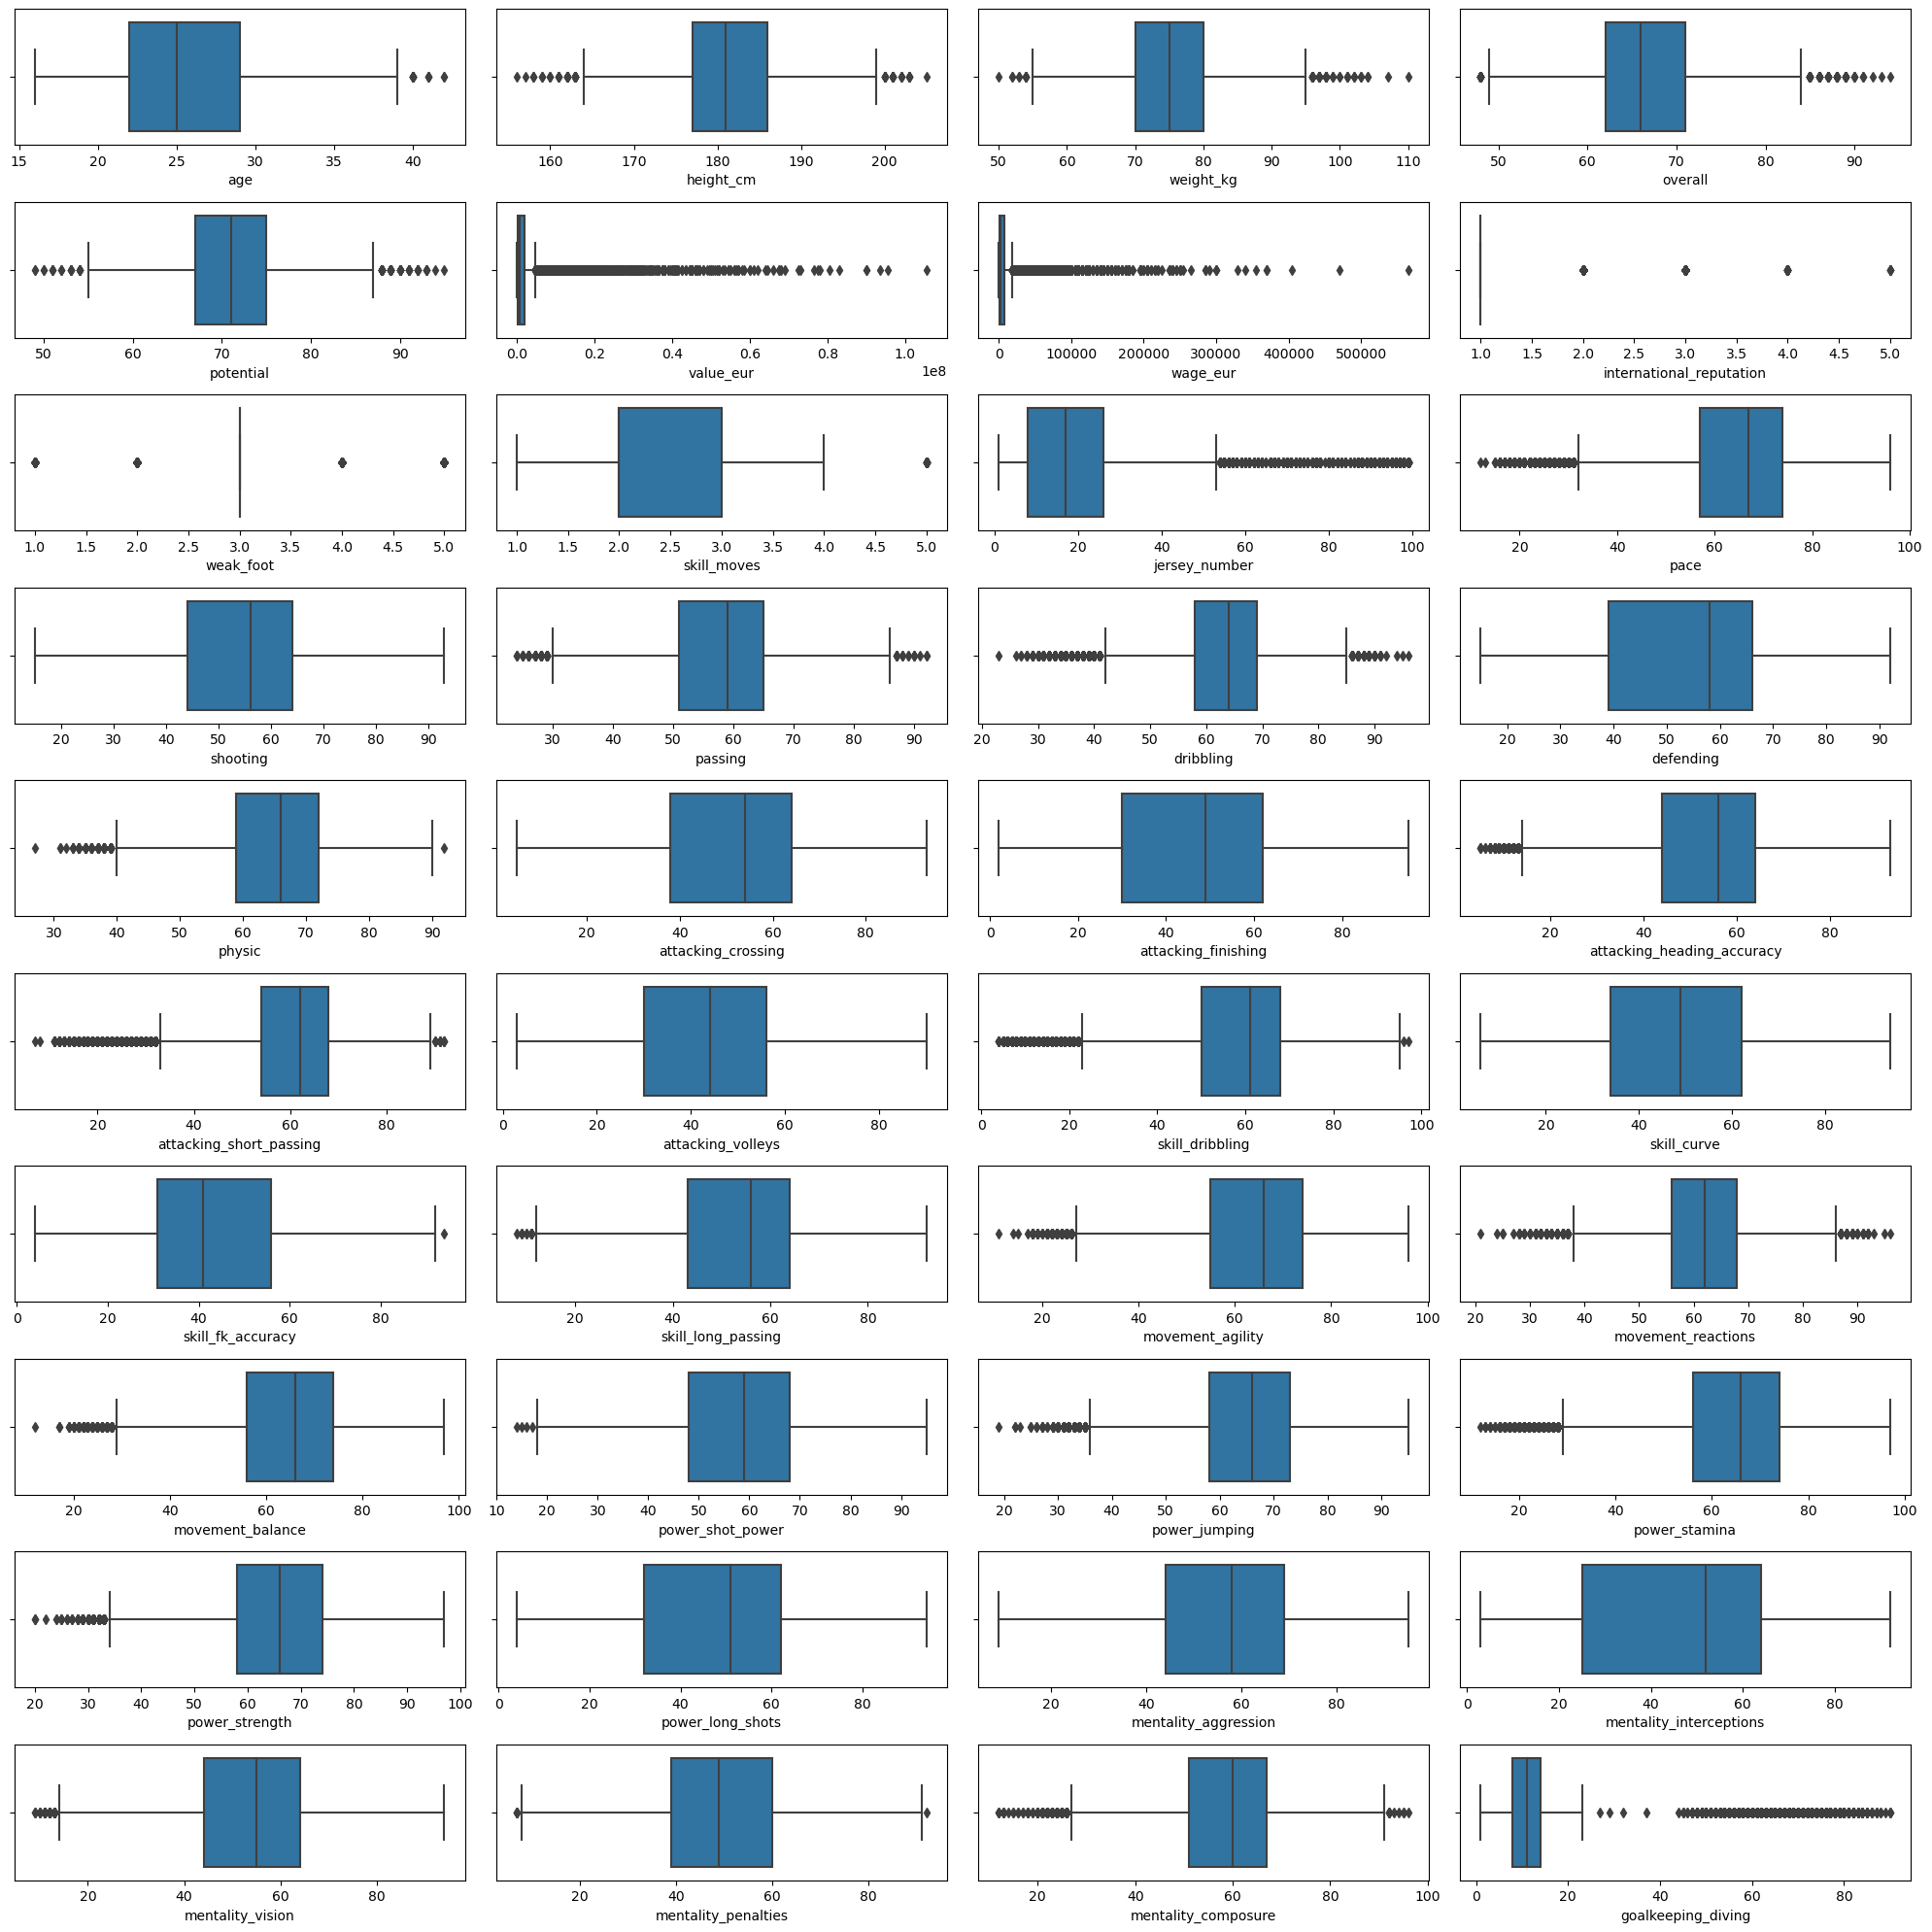

In [77]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(df_selected.columns):
    sns.boxplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [78]:
# Creating a function to fix outliers
def handle_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

In [79]:
df2 = handle_outliers(num_col)

## After Handling outliers we plot the boxplot again

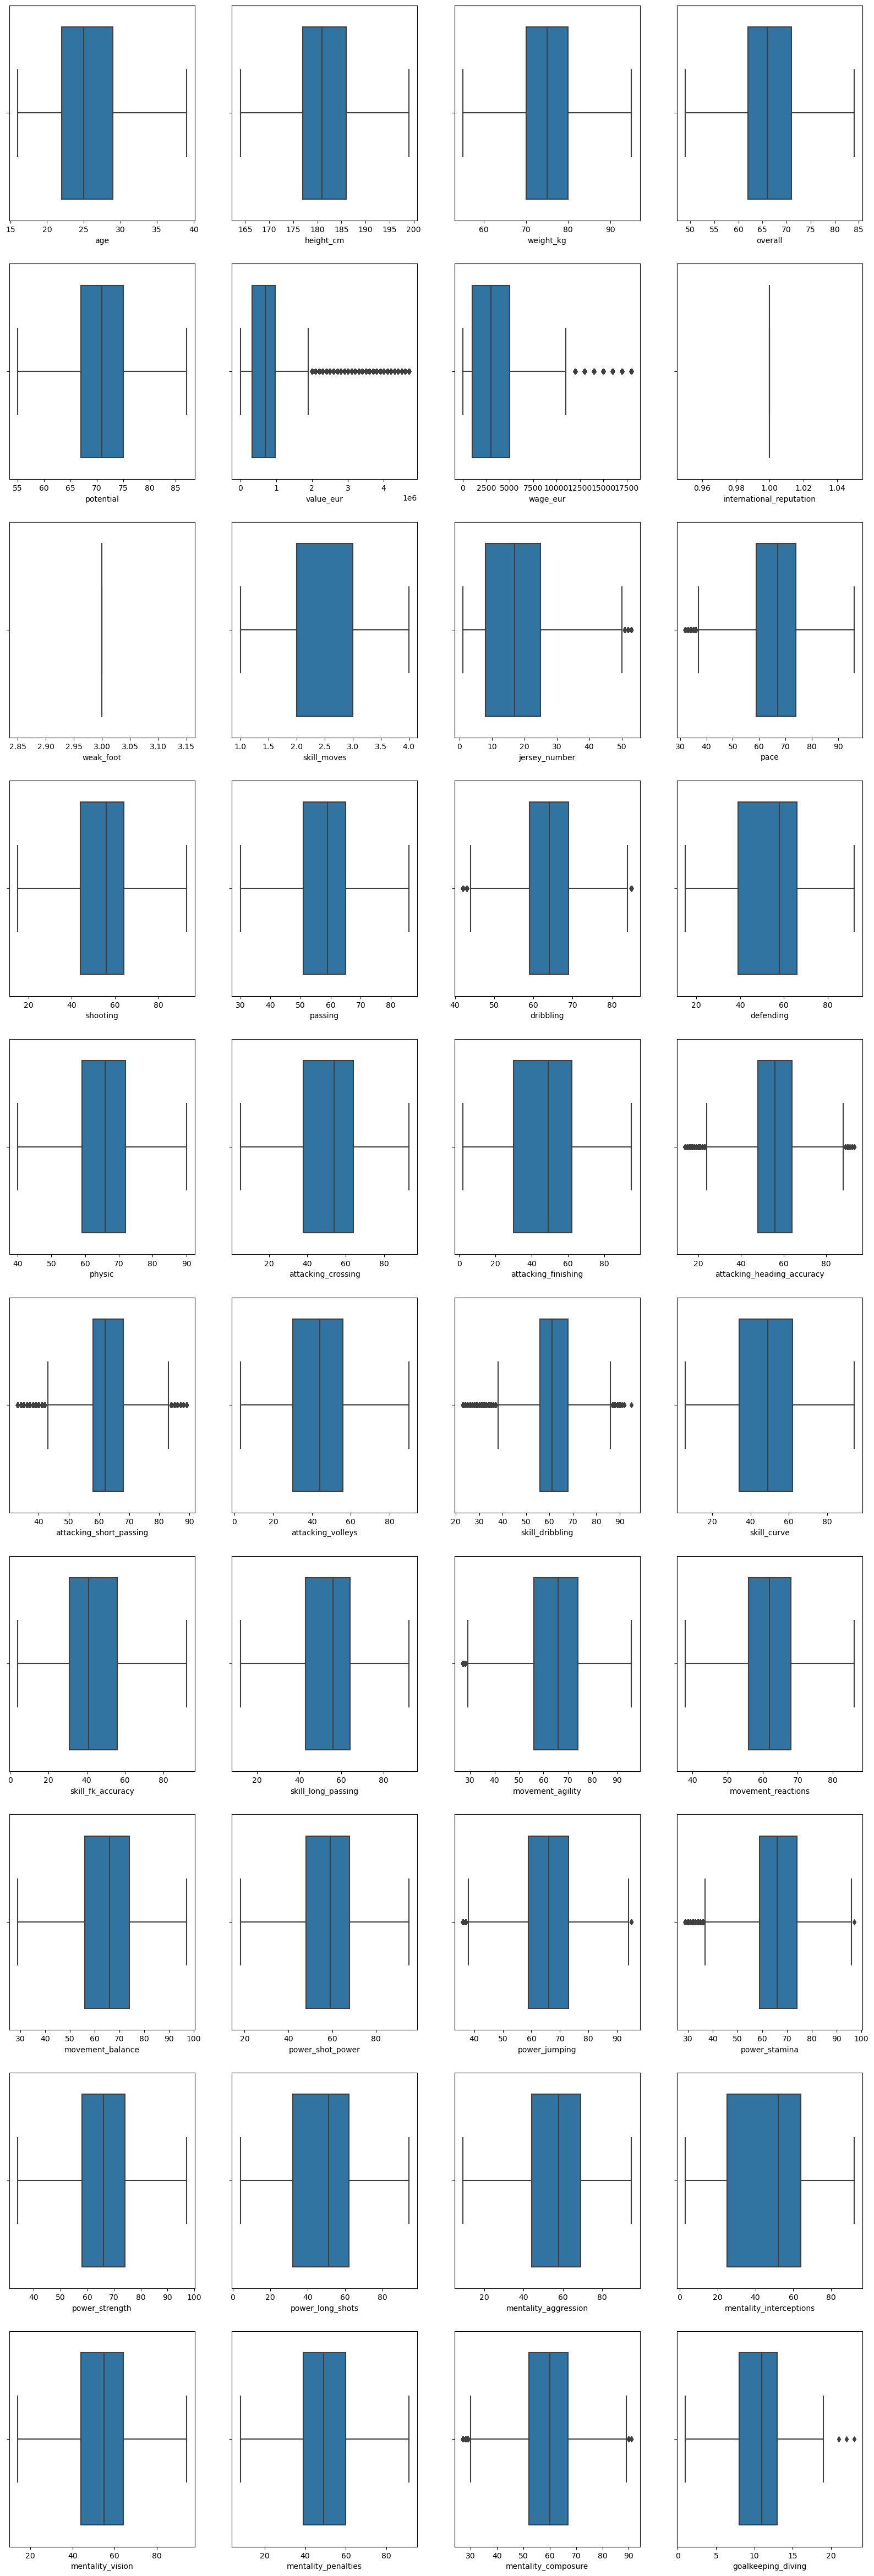

In [80]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for columns in df2:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(x=columns,data=df2)
        plotnumber+=1
plt.show()

## Categorical Columns important features

In [81]:
cat_cols1 = cat_cols.iloc[:, 4:]
cat_cols1=pd.concat([cat_cols1,num_col['overall']],axis=1)
cat_cols1.head()

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,ls,st,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,overall
0,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,RW,89+2,89+2,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,66.0
1,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,LW,91+3,91+3,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,66.0
2,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,CAM,84+3,84+3,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,66.0
3,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,GK,0,0,...,0,0,0,0,0,0,0,0,0,66.0
4,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,LW,83+3,83+3,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,66.0


### Our Stategies to handle the categorical features:

#### 1.We will rename the short form columns like 'ls', 'st' to their full form for our better understanding.

#### 2.We see that in these various postions columns the values given are for example 89+2. Here 89 is the overall rating and 89+2=91 is the potential rating.

#### 3.We will derive the values as the first part of the value as overall and the second part of the value after '+' sign as potential value.

In [82]:
positions = {'ls': 'Left Striker',
                    'st': 'Striker',
                    'rs': 'Right Striker',
                    'lw': 'Left Winger',
                    'lf': 'Left Forward',
                    'cf': 'Center Forward',
                    'rf': 'Right Forward',
                    'rw': 'Right Winger',
                    'lam': 'Left Attacking Midfielder',
                    'cam': 'Center Attacking Midfielder',
                    'ram': 'Right Attacking Midfielder',
                    'lm': 'Left Midfielder',
                    'lcm': 'Left Center Midfielder',
                    'cm': 'Center Midfielder',
                    'rcm': 'Right Center Midfielder',
                    'rm': 'Right Midfielder',
                    'lwb': 'Left Wing Back',
                    'ldm': 'Left Defensive Midfielder',
                    'cdm': 'Center Defensive Midfielder',
                    'rdm': 'Right Defensive Midfielder',
                    'rwb': 'Right Wing Back',
                    'lb': 'Left Back',
                    'lcb': 'Left Center Back',
                    'cb': 'Center Back',
                    'rcb': 'Right Center Back',
                    'rb': 'Right Back'}

cat_cols1 = cat_cols1.rename(columns=positions)

## Handing the various postions columns with its overall + potential rating in our dataset

In [83]:
# Define the position columns to split
pos_cols = ['Left Striker', 'Striker', 'Right Striker', 'Left Winger', 'Left Forward','Center Forward', 'Right Forward', 
             'Right Winger', 'Left Attacking Midfielder','Center Attacking Midfielder', 'Right Attacking Midfielder', 
             'Left Midfielder','Left Center Midfielder', 'Center Midfielder', 'Right Center Midfielder',
             'Right Midfielder', 'Left Wing Back', 'Left Defensive Midfielder','Center Defensive Midfielder',
             'Right Defensive Midfielder', 'Right Wing Back','Left Back', 'Left Center Back', 'Center Back',
             'Right Center Back', 'Right Back']

# Split the position columns into separate columns for overall and potential ratings
for col in pos_cols:
    cat_cols1[[col+'_overall', col+'_potential']] = cat_cols1[col].str.split('+', expand=True)
    
    # Convert the new columns to numeric data types
    cat_cols1[col+'_overall'] = pd.to_numeric(cat_cols1[col+'_overall'])
    cat_cols1[col+'_potential'] = pd.to_numeric(cat_cols1[col+'_potential'])
    cat_cols1[col+'_potential'] = cat_cols1[col+'_overall'] + cat_cols1[col+'_potential'] 

# Drop the original position columns
cat_cols1.drop(pos_cols, axis=1, inplace=True)

In [84]:
cat_cols1.head(2)

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,overall,Left Striker_overall,...,Left Back_overall,Left Back_potential,Left Center Back_overall,Left Center Back_potential,Center Back_overall,Center Back_potential,Right Center Back_overall,Right Center Back_potential,Right Back_overall,Right Back_potential
0,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,RW,66.0,89.0,...,63.0,65.0,52.0,54.0,52.0,54.0,52.0,54.0,63.0,65.0
1,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,LW,66.0,91.0,...,61.0,64.0,53.0,56.0,53.0,56.0,53.0,56.0,61.0,64.0


## We will fill the missing values with median of overall rating and median of potential rating

In [85]:
for i in cat_cols1:
    if 'overall' in i:
        cat_cols1[i] = cat_cols1[i].fillna(df['overall'].median())
    elif 'potential' in i:
        cat_cols1[i] = cat_cols1[i].fillna(df['potential'].median())

## Fixing the body_type feature in our dataset

In [86]:
cat_cols1.body_type.value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: body_type, dtype: int64

In [87]:
list1 = ['Normal','Lean','Stocky']

for i in cat_cols1['body_type']:
    if i not in list1:
        cat_cols1['body_type'] = cat_cols1['body_type'].replace(i,cat_cols1.body_type.mode().values[0])

In [88]:
find_missing(cat_cols1)

'There are no null values!'

## Encoding the categorical columns with label encoder to convert to numeric

In [89]:
cat_cols_le = cat_cols1.copy()

In [90]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to label encode
le_cols = ['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position']

# Loop through the categorical columns and apply label encoding
for col in le_cols:
    le = LabelEncoder()
    cat_cols_le[col] = le.fit_transform(cat_cols_le[col].astype(str))

cat_cols_le.head(2)

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,overall,Left Striker_overall,...,Left Back_overall,Left Back_potential,Left Center Back_overall,Left Center Back_potential,Center Back_overall,Center Back_potential,Right Center Back_overall,Right Center Back_potential,Right Back_overall,Right Back_potential
0,5,224,544,0,7,1,1,25,66.0,89.0,...,63.0,65.0,52.0,54.0,52.0,54.0,52.0,54.0,63.0,65.0
1,121,350,620,1,1,1,1,14,66.0,91.0,...,61.0,64.0,53.0,56.0,53.0,56.0,53.0,56.0,61.0,64.0


In [91]:
cat_cols_le.corr()["overall"].sort_values()[45:-1]

Right Forward_overall                  0.553702
Left Striker_overall                   0.566713
Striker_overall                        0.566713
Right Striker_overall                  0.566713
Center Attacking Midfielder_overall    0.568854
Right Attacking Midfielder_overall     0.568854
Left Attacking Midfielder_overall      0.568854
Right Midfielder_overall               0.572928
Left Midfielder_overall                0.572928
Left Center Midfielder_potential       0.624681
Center Midfielder_potential            0.624681
Right Center Midfielder_potential      0.624681
Left Center Midfielder_overall         0.654892
Center Midfielder_overall              0.654892
Right Center Midfielder_overall        0.654892
Name: overall, dtype: float64

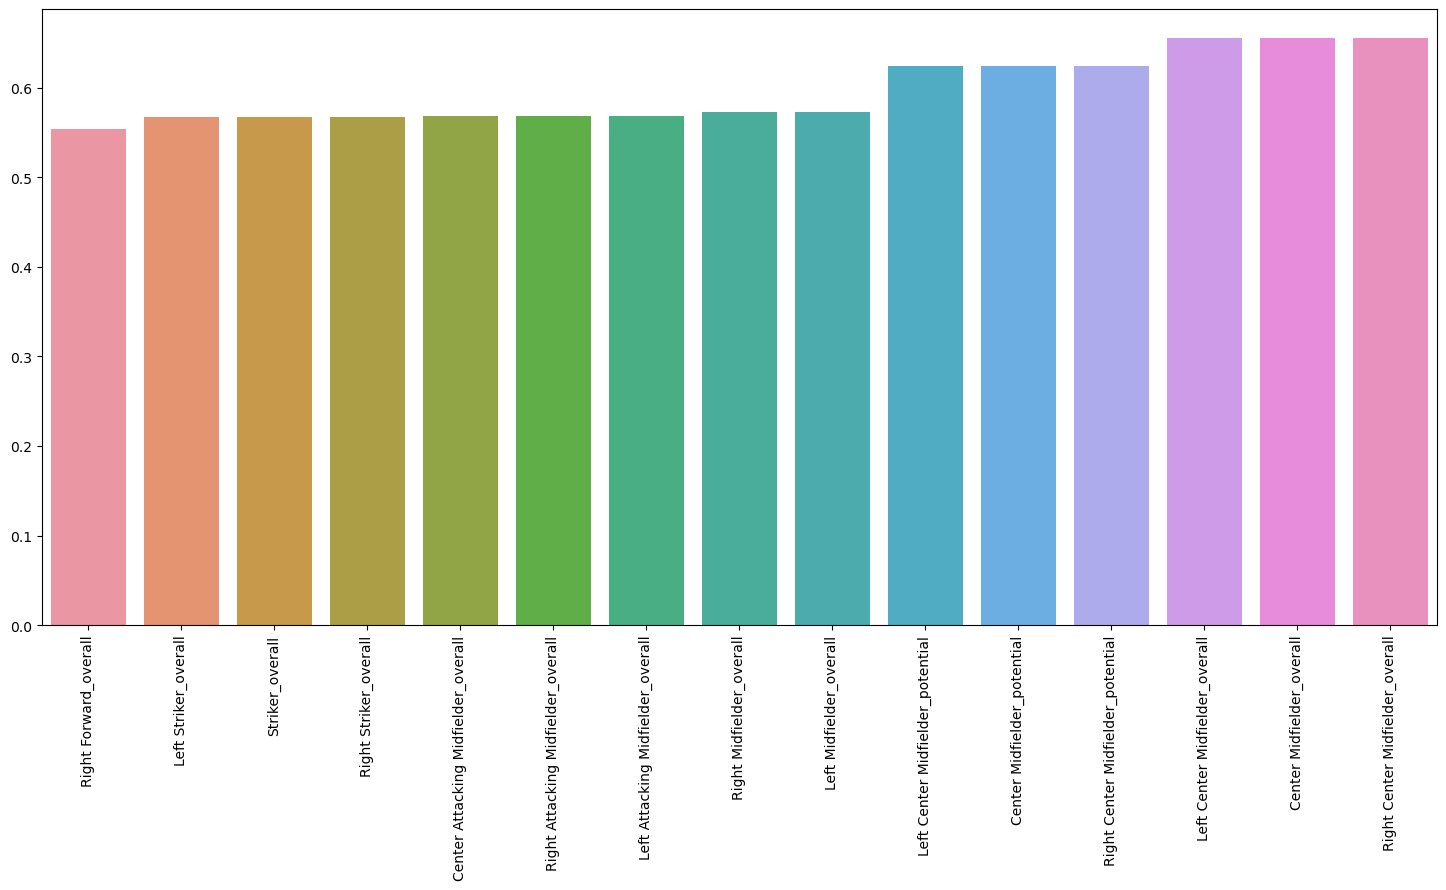

In [92]:
plt.figure(figsize=(18,8))
sns.barplot(x= cat_cols_le.corr()["overall"].sort_values()[45:-1].index,y = cat_cols_le.corr()["overall"].sort_values()[45:-1].values)
plt.xticks(rotation = 90);

### Our Insights:

#### 1.Here we have captured that the features like 'Right Center Midfielder and Center Midfielder are highly correlated with overall rating of the players.

#### 2.We need to take into account these important features when we are building our team

## Removing Highly correlated data for categorical features


In [93]:
cor_matrix = cat_cols1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cat_cols2 = cat_cols1.drop(to_drop, axis=1)

In [94]:
cat_cols2.shape

(18278, 14)

## Handling Outliers of Categorical features

In [95]:
cat_cols2

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,overall,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall
0,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Normal,Yes,RW,66.0,89.0,93.0,87.0,68.0,52.0
1,Portugal,Juventus,"ST, LW",Right,High/Low,Normal,Yes,LW,66.0,91.0,89.0,81.0,65.0,53.0
2,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Normal,Yes,CAM,66.0,84.0,90.0,82.0,66.0,46.0
3,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,GK,66.0,66.0,66.0,66.0,66.0,66.0
4,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,LW,66.0,83.0,89.0,83.0,66.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,China PR,Beijing Renhe FC,CB,Right,Medium/High,Normal,No,RES,66.0,32.0,31.0,33.0,43.0,46.0
18274,China PR,Shanghai SIPG FC,CB,Right,Medium/Medium,Normal,No,SUB,66.0,33.0,33.0,36.0,44.0,47.0
18275,China PR,Hebei China Fortune FC,CM,Right,Low/Medium,Lean,No,SUB,66.0,43.0,43.0,46.0,47.0,49.0
18276,China PR,Shanghai Greenland Shenhua FC,CM,Right,Low/Low,Lean,No,SUB,66.0,43.0,45.0,46.0,48.0,49.0


In [96]:
CR = cat_cols2.drop(['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 
                      'body_type', 'real_face', 'team_position','overall'],axis =1)

CR

,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall
0,89.0,93.0,87.0,68.0,52.0
1,91.0,89.0,81.0,65.0,53.0
2,84.0,90.0,82.0,66.0,46.0
3,66.0,66.0,66.0,66.0,66.0
4,83.0,89.0,83.0,66.0,49.0
...,...,...,...,...,...
18273,32.0,31.0,33.0,43.0,46.0
18274,33.0,33.0,36.0,44.0,47.0
18275,43.0,43.0,46.0,47.0,49.0
18276,43.0,45.0,46.0,48.0,49.0


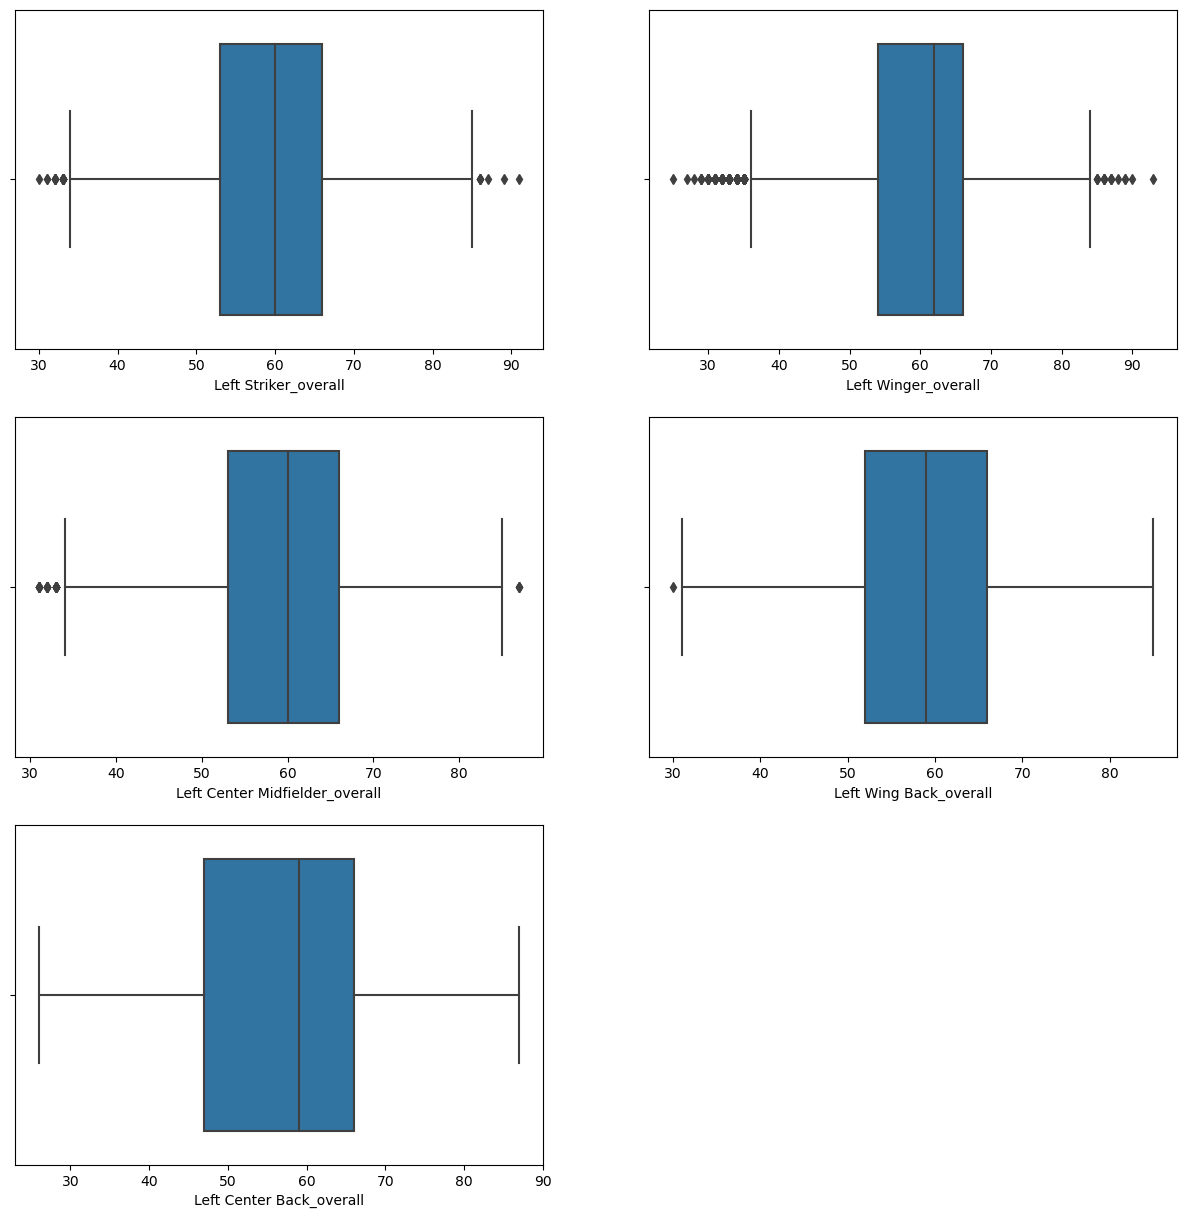

In [97]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
 if plotnumber<=5:
    ax=plt.subplot(3,2,plotnumber)
    sns.boxplot(x=columns, data=CR)
    plotnumber+=1
plt.show()

In [98]:
handle_outliers(CR)

,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall
0,60.0,62.0,60.0,68.0,52.0
1,60.0,62.0,81.0,65.0,53.0
2,84.0,62.0,82.0,66.0,46.0
3,66.0,66.0,66.0,66.0,66.0
4,83.0,62.0,83.0,66.0,49.0
...,...,...,...,...,...
18273,60.0,62.0,60.0,43.0,46.0
18274,60.0,62.0,36.0,44.0,47.0
18275,43.0,43.0,46.0,47.0,49.0
18276,43.0,45.0,46.0,48.0,49.0


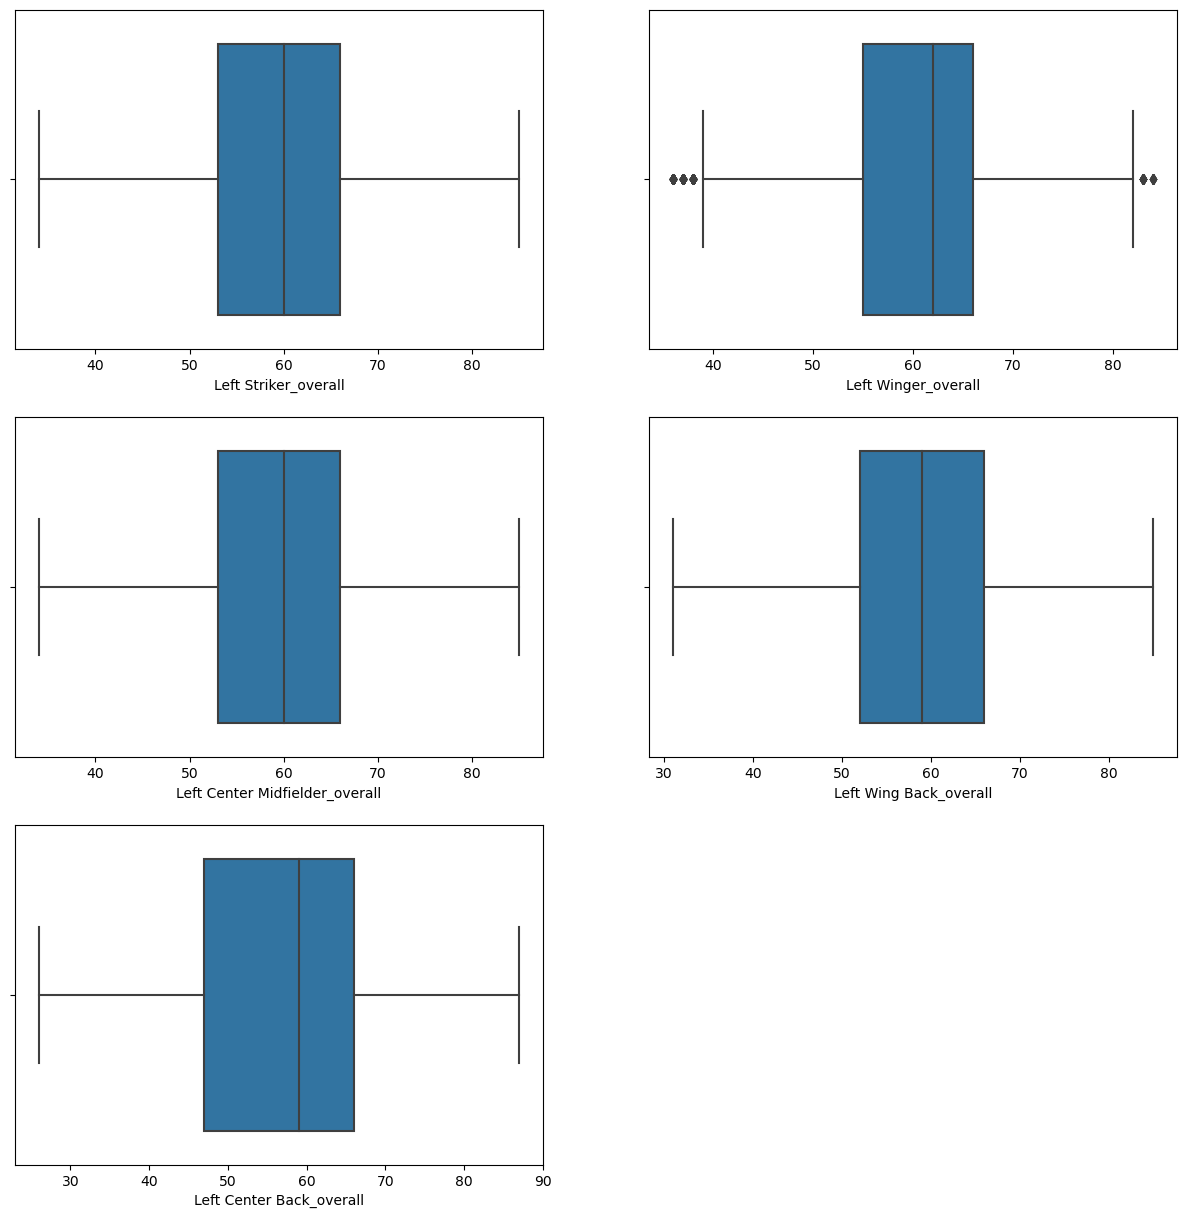

In [101]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x=columns, data=CR)
        plotnumber+=1
plt.show()

In [102]:
cat_cols2 = cat_cols2[le_cols]

## One Hot Encoding

In [103]:
cat_cols2=pd.get_dummies(cat_cols2,drop_first=True)

In [104]:
df2.shape

(18278, 40)

In [105]:
cat_cols2.shape

(18278, 1540)

In [106]:
CR.shape

(18278, 5)

In [107]:
final_df2 = pd.concat([df2,cat_cols2,CR],axis=1)
final_df2.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,team_position_RS,team_position_RW,team_position_RWB,team_position_ST,team_position_SUB,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall
0,32.0,170.0,72.0,66.0,71.0,700000.0,3000.0,1.0,3.0,4.0,...,0,1,0,0,0,60.0,62.0,60.0,68.0,52.0
1,34.0,187.0,83.0,66.0,71.0,700000.0,3000.0,1.0,3.0,2.0,...,0,0,0,0,0,60.0,62.0,81.0,65.0,53.0
2,27.0,175.0,68.0,66.0,71.0,700000.0,3000.0,1.0,3.0,2.0,...,0,0,0,0,0,84.0,62.0,82.0,66.0,46.0
3,26.0,188.0,87.0,66.0,71.0,700000.0,3000.0,1.0,3.0,1.0,...,0,0,0,0,0,66.0,66.0,66.0,66.0,66.0
4,28.0,175.0,74.0,66.0,71.0,700000.0,3000.0,1.0,3.0,4.0,...,0,0,0,0,0,83.0,62.0,83.0,66.0,49.0


In [108]:
final_df2.shape

(18278, 1585)

#### We have now converted our dataset into features with only numerical data, so that it can be ready to be fed into a machine learning model.

#### However since we will be doing distance based algorithms like K-Means Clustering so it is a must to scale our data.

## Scaling Our Data

In [109]:
from sklearn.preprocessing import MinMaxScaler
SC= MinMaxScaler()
scaled_data=pd.DataFrame(SC.fit_transform(final_df2),columns= final_df2.columns)

In [110]:
scaled_data

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,team_position_RS,team_position_RW,team_position_RWB,team_position_ST,team_position_SUB,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall
0,0.695652,0.171429,0.425,0.485714,0.50000,0.148936,0.166667,0.0,0.0,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.509804,0.541667,0.509804,0.685185,0.426230
1,0.782609,0.657143,0.700,0.485714,0.50000,0.148936,0.166667,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.509804,0.541667,0.921569,0.629630,0.442623
2,0.478261,0.314286,0.325,0.485714,0.50000,0.148936,0.166667,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.980392,0.541667,0.941176,0.648148,0.327869
3,0.434783,0.685714,0.800,0.485714,0.50000,0.148936,0.166667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.627451,0.625000,0.627451,0.648148,0.655738
4,0.521739,0.314286,0.475,0.485714,0.50000,0.148936,0.166667,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.960784,0.541667,0.960784,0.648148,0.377049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0.260870,0.628571,0.600,0.485714,0.03125,0.008511,0.111111,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.509804,0.541667,0.509804,0.222222,0.327869
18274,0.260870,0.371429,0.275,0.485714,0.03125,0.008511,0.111111,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.509804,0.541667,0.039216,0.240741,0.344262
18275,0.130435,0.628571,0.500,0.485714,0.03125,0.008511,0.055556,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.176471,0.145833,0.235294,0.296296,0.377049
18276,0.086957,0.600000,0.475,0.485714,0.50000,0.008511,0.055556,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.176471,0.187500,0.235294,0.314815,0.377049


## Attempting Principal Component Analysis

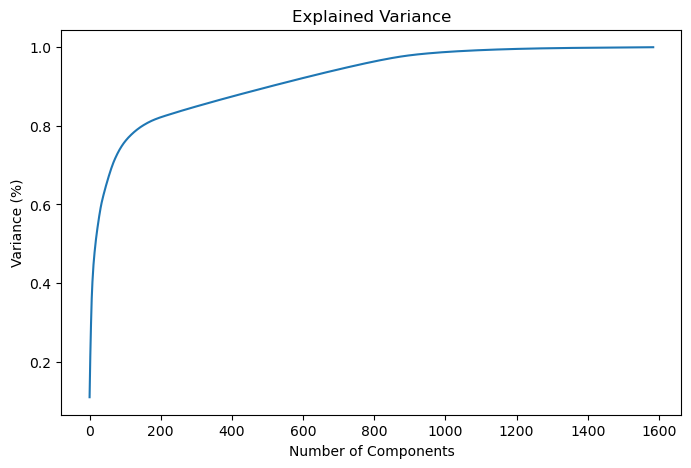

In [111]:
## getting the optimal number of pca
from sklearn.decomposition import PCA

# Initialize the PCA object
pca = PCA()
principalComponents = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
           #np.cumcum - Returns the cumulative sum of the elements along a given axis.
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [112]:
# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that add up to 95% of the explained variance ratio
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Print the number of components
print("Number of components that add up to 95% of the explained variance ratio:", n_components)

Number of components that add up to 95% of the explained variance ratio: 732


In [113]:
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(final_df2)

In [114]:
# Create the new DataFrame by adding PCA columns to the original dataframe
pca_df = pd.DataFrame(new_data, columns=["PC{}".format(i+1) for i in range(n_components)])

In [115]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC723,PC724,PC725,PC726,PC727,PC728,PC729,PC730,PC731,PC732
0,-207258.107200,-483.813059,-125.799226,-17.455282,-1.230137,6.289115,-10.743917,-4.083092,3.457554,-3.736491,...,-0.019204,-0.020102,-0.013562,0.001245,0.012779,0.013875,0.004995,-0.016276,0.007765,-0.002673
1,-207258.106732,-483.746359,-135.325281,-8.087171,17.233450,41.044264,-23.477669,0.661150,-6.141907,-8.532200,...,0.017565,-0.011482,-0.004409,0.008760,0.011534,-0.012757,-0.006565,-0.024641,0.001245,0.003252
2,-207258.107104,-483.801720,-135.426985,-26.970312,8.853055,-3.893450,2.970682,2.171609,-9.991104,-7.780302,...,-0.013007,0.034723,-0.023998,0.034650,0.006821,-0.018990,0.062248,-0.002189,0.066128,-0.037005
3,-207258.110232,-484.182823,82.598881,-13.922529,62.714797,2.714999,-9.764465,-32.737078,5.483988,22.701722,...,0.015421,0.019269,-0.004077,-0.007989,0.014031,0.005722,-0.000333,-0.010826,-0.022752,0.005148
4,-207258.106807,-483.759214,-138.424226,-17.211171,31.048601,-2.625768,-5.984960,2.657970,-7.428825,-11.306032,...,0.015036,0.003671,-0.015803,0.017155,0.041982,-0.015314,-0.058696,-0.003032,-0.016527,-0.005536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,-867258.818371,-227.356563,69.442998,-11.812267,-24.604448,-16.604558,2.098985,1.167463,12.699570,13.390634,...,0.010466,0.021486,0.022935,-0.001872,0.014507,0.005652,0.005292,-0.005115,0.029969,0.007773
18274,-867258.818400,-227.363823,63.793709,-13.169559,-37.705848,-23.755079,6.049802,-3.634656,14.881458,7.879256,...,-0.024481,-0.009133,0.002454,0.003198,0.021309,0.006737,-0.013576,0.024078,0.011157,-0.015342
18275,-867260.722317,-1227.294493,40.723217,-3.497571,-30.613916,-6.514631,23.056979,10.404156,11.894486,4.468336,...,0.061495,-0.024507,-0.039401,-0.020190,-0.023048,0.020528,0.019961,0.025572,0.006504,0.003782
18276,-867260.722117,-1227.269106,31.255213,-0.762938,-28.525008,-10.288748,23.074018,4.139448,11.792808,2.063643,...,-0.021783,0.027544,0.008678,0.013037,-0.011758,0.009523,0.012488,-0.044646,-0.035852,0.002774


## Clustering our Data

In [116]:
X= pca_df
X.shape

(18278, 732)

## K-Means Clustering using Elbow Method
#### Using elbow method we will first find out the optimal number of n_cluster for our K-Means Clustering algorithms



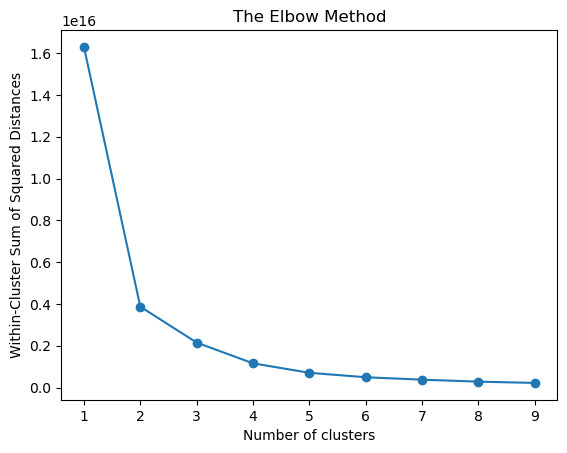

In [117]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared Distances')
plt.show()

## K-Means Clustering using silhouettee score

In [118]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans


for i in range(2,6):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    label=model.labels_
    label
    from sklearn.metrics import silhouette_score
    score=silhouette_score(X,label)
    print('The silhouettee_score for {} clusters in KMeans Algorithm is {}.'.format(i,round(score,2)))

The silhouettee_score for 2 clusters in KMeans Algorithm is 0.79.
The silhouettee_score for 3 clusters in KMeans Algorithm is 0.65.
The silhouettee_score for 4 clusters in KMeans Algorithm is 0.59.
The silhouettee_score for 5 clusters in KMeans Algorithm is 0.62.


## K-Means Clustering using Davis Bouldin Score

In [119]:
from sklearn.metrics import davies_bouldin_score

for i in range(2,6):
    n_clusters = i
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    labels = model.labels_
    score = davies_bouldin_score(X, labels)
    print("Davies bouldin score for {} clusters is {}.".format(i,round(score,2)))

Davies bouldin score for 2 clusters is 0.4.
Davies bouldin score for 3 clusters is 0.55.
Davies bouldin score for 4 clusters is 0.52.
Davies bouldin score for 5 clusters is 0.47.


#### We select n_cluster = 2 based on results from elbow method,silhouettee score and Davies bouldin score

In [120]:
final_kmeans_model = KMeans(n_clusters=2,random_state=42)
cluster_labels = final_kmeans_model.fit_predict(X)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
# Count the number of data points in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the cluster counts
print(cluster_counts)

0    15976
1     2302
dtype: int64


#### Here we find 2 labels 0 and 1



## We put the clusters in our dataset

In [122]:
final_df2['Cluster'] = cluster_labels
final_df2[final_df2['Cluster']==1]

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,team_position_RW,team_position_RWB,team_position_ST,team_position_SUB,Left Striker_overall,Left Winger_overall,Left Center Midfielder_overall,Left Wing Back_overall,Left Center Back_overall,Cluster
200,25.0,192.0,92.0,83.0,83.0,2600000.0,3000.0,1.0,3.0,1.0,...,0,0,0,1,66.0,66.0,66.0,66.0,66.0,1
201,38.0,185.0,84.0,83.0,83.0,2600000.0,11000.0,1.0,3.0,1.0,...,0,0,0,0,66.0,66.0,66.0,66.0,66.0,1
286,36.0,188.0,92.0,82.0,82.0,3700000.0,3000.0,1.0,3.0,1.0,...,0,0,0,1,66.0,66.0,66.0,66.0,66.0,1
489,35.0,188.0,83.0,80.0,80.0,4000000.0,17000.0,1.0,3.0,1.0,...,0,0,0,0,66.0,66.0,66.0,66.0,66.0,1
491,35.0,174.0,73.0,80.0,80.0,4700000.0,13000.0,1.0,3.0,2.0,...,0,0,0,0,62.0,65.0,72.0,75.0,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,19.0,180.0,70.0,68.0,83.0,1900000.0,2000.0,1.0,3.0,4.0,...,1,0,0,0,61.0,67.0,62.0,63.0,54.0,1
6643,21.0,180.0,73.0,68.0,82.0,2000000.0,12000.0,1.0,3.0,4.0,...,0,0,0,1,57.0,66.0,58.0,51.0,38.0,1
6646,19.0,178.0,74.0,68.0,82.0,1900000.0,1000.0,1.0,3.0,3.0,...,0,0,0,1,67.0,66.0,66.0,68.0,68.0,1
6648,20.0,173.0,63.0,68.0,82.0,2000000.0,3000.0,1.0,3.0,3.0,...,0,0,0,0,64.0,66.0,64.0,57.0,50.0,1


## We visualize which cluster of players has the greater potential rating


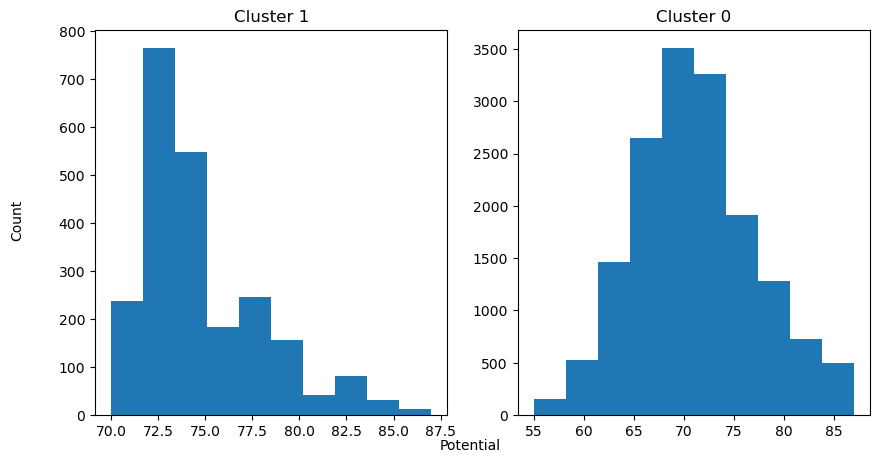

In [123]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster']==1]['potential'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster']==0]['potential'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Potential', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

### Our Insights:

#### 1.Here we see that the cluster labeled 1 has more players with greater potential

## We visualize which cluster of players has the greater overall rating

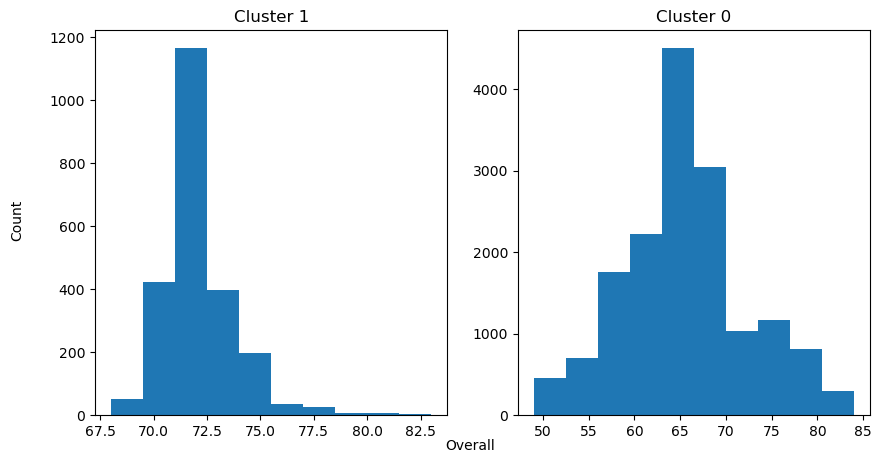

In [124]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster']==1]['overall'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster']==0]['overall'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Overall', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

### Our Insights:

#### 1.Here we see that the cluster labeled 1 has more players with greater overall rating

## Finding the features that are highly correlated with our clusters

In [125]:
final_df2.corr()['Cluster'][:-2].sort_values()

team_position_RES          -0.099190
work_rate_Medium/Medium    -0.098829
jersey_number              -0.078149
team_position_SUB          -0.060494
nationality_England        -0.052665
                              ...   
overall                     0.322516
wage_eur                    0.377651
value_eur                   0.873302
international_reputation         NaN
weak_foot                        NaN
Name: Cluster, Length: 1584, dtype: float64

<Axes: xlabel='value_eur', ylabel='overall'>

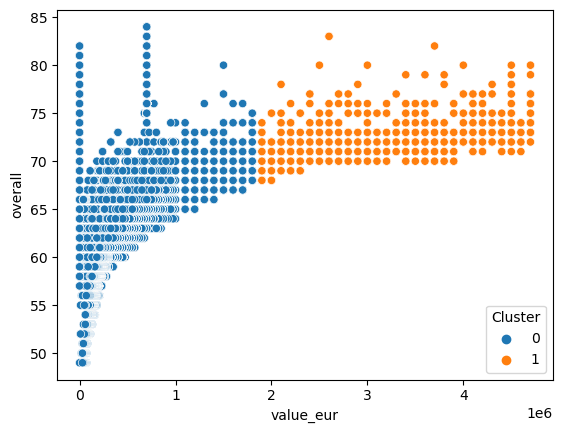

In [126]:
sns.scatterplot(data =final_df2, x= 'value_eur',y='overall',hue ='Cluster')

### Our Insights:

#### 1.We find that value_eur and overall rating are positively correlated to each other and as our overall rating and value_eur increases the chances of players being in cluster 1 is more

## Creating an ideal budget for competetive players

In [127]:
cat_cols1.drop('overall',axis=1,inplace = True)

#### From our findings we have derived that the players from cluster 1 have more potential and overall rating so we should take players from cluster 1 to form our team.

In [128]:
final_df = pd.concat([cat_cols1,num_col,final_df2['Cluster']],axis=1)
final_df = final_df[final_df['Cluster']==1]

In [129]:
# Sorting values and bringing name of players back into our new dataset
final_df = final_df.sort_values(by=['value_eur', 'overall'], ascending=False)
final_df['Name'] = df['short_name']
final_df

,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,Left Striker_overall,Left Striker_potential,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,Cluster,Name
491,Argentina,Hebei China Fortune FC,"CDM, CB",Right,Low/High,Normal,Yes,CDM,62.0,65.0,...,70.0,55.0,87.0,85.0,68.0,60.0,81.0,6.0,1,J. Mascherano
563,Brazil,Fluminense,"CDM, CM",Right,High/High,Stocky,No,CDM,66.0,68.0,...,71.0,64.0,81.0,79.0,73.0,61.0,68.0,9.0,1,Everton Andrão
673,Slovakia,Atalanta,CB,Right,Medium/High,Normal,Yes,SUB,52.0,55.0,...,86.0,35.0,84.0,77.0,28.0,39.0,71.0,15.0,1,M. Škrtel
1146,Bosnia Herzegovina,Hertha BSC,ST,Right,Medium/Low,Normal,No,ST,75.0,77.0,...,76.0,66.0,78.0,30.0,71.0,83.0,79.0,16.0,1,V. Ibišević
1148,England,New York Red Bulls,ST,Right,High/Medium,Normal,Yes,SUB,76.0,78.0,...,65.0,63.0,66.0,44.0,67.0,65.0,78.0,12.0,1,B. Wright-Phillips
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,Scotland,Portsmouth,"CDM, CB, RB",Right,Medium/High,Lean,No,RDM,54.0,56.0,...,78.0,33.0,80.0,69.0,44.0,29.0,59.0,10.0,1,R. McCrorie
6638,Wales,Oxford United,"CAM, LW, ST",Right,High/Medium,Normal,Yes,CAM,63.0,65.0,...,53.0,62.0,31.0,28.0,60.0,62.0,60.0,14.0,1,B. Woodburn
6639,Norway,FK Bodø/Glimt,RW,Left,High/High,Lean,No,RW,61.0,63.0,...,45.0,66.0,54.0,37.0,60.0,50.0,67.0,11.0,1,H. Evjen
6646,Ivory Coast,Perugia,CM,Right,High/Medium,Normal,No,SUB,67.0,69.0,...,71.0,65.0,64.0,68.0,58.0,60.0,62.0,8.0,1,C. Kouan


In [130]:
# Taking the columns needed to find the best players
df3 = final_df[["Name","club","team_position","overall","value_eur"]]
df3

,Name,club,team_position,overall,value_eur
491,J. Mascherano,Hebei China Fortune FC,CDM,80.0,4700000.0
563,Everton Andrão,Fluminense,CDM,80.0,4700000.0
673,M. Škrtel,Atalanta,SUB,79.0,4700000.0
1146,V. Ibišević,Hertha BSC,ST,77.0,4700000.0
1148,B. Wright-Phillips,New York Red Bulls,SUB,77.0,4700000.0
...,...,...,...,...,...
6637,R. McCrorie,Portsmouth,RDM,68.0,1900000.0
6638,B. Woodburn,Oxford United,CAM,68.0,1900000.0
6639,H. Evjen,FK Bodø/Glimt,RW,68.0,1900000.0
6646,C. Kouan,Perugia,SUB,68.0,1900000.0


In [131]:
# Postions required to fill to form a team

positions = ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CM', 'CAM', 'LW', 'ST', 'RW']

In [132]:
# Making a selection of players based on positions and players who has the most value_eur and overall rating.  

selected_players = pd.DataFrame(index=df3.index)

for i in positions:
    row = df3[df3['team_position'] == i].head(1)

    selected_players = selected_players.append(row)


selected_players = selected_players.dropna()
selected_players

,Name,club,team_position,overall,value_eur
1954,S. Grytebust,FC København,GK,75.0,4700000.0
2765,N. Murru,Sampdoria,LB,73.0,4700000.0
2769,H. Magnússon,PFC CSKA Moscow,CB,73.0,4700000.0
2769,H. Magnússon,PFC CSKA Moscow,CB,73.0,4700000.0
2777,F. Campos,Colo-Colo,RB,73.0,4700000.0
491,J. Mascherano,Hebei China Fortune FC,CDM,80.0,4700000.0
2880,M. Abeid,FC Nantes,CM,73.0,4300000.0
2919,P. Kasami,FC Sion,CAM,73.0,4600000.0
3359,S. Adegbenro,Rosenborg BK,LW,72.0,4600000.0
1146,V. Ibišević,Hertha BSC,ST,77.0,4700000.0


## Budget for our ideal item

In [133]:
print(f"Total budget of this player combination will be {selected_players.value_eur.sum()}")

Total budget of this player combination will be 51100000.0


## Hierarchial Clustering

In [134]:
from sklearn.cluster import AgglomerativeClustering

# Initialize AgglomerativeClustering with the desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Fit the model on your preprocessed data X
agg_clustering.fit_predict(X)

# Get the labels assigned by AgglomerativeClustering to each data point
labels1 = agg_clustering.labels_

In [135]:
labels1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
import pandas as pd

# Count the number of data points in each cluster
cluster_counts = pd.Series(labels1).value_counts()

# Print the cluster counts
print(cluster_counts)

0    16097
1     2181
dtype: int64


In [137]:
final_df2 = final_df2.drop('Cluster',axis=1)
final_df2['Cluster_H'] = labels1

## Visualizing which cluster of players are having greater potential rating

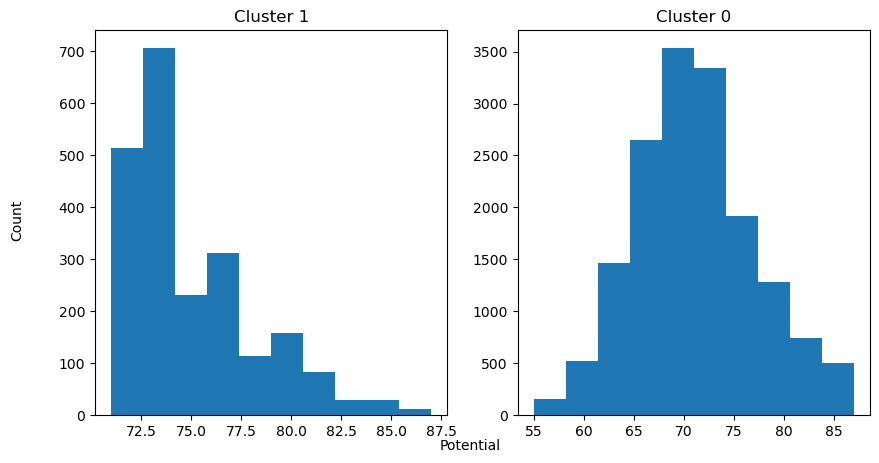

In [138]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster_H']==1]['potential'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster_H']==0]['potential'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Potential', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

## Visualizing which cluster of players are having greater overall rating

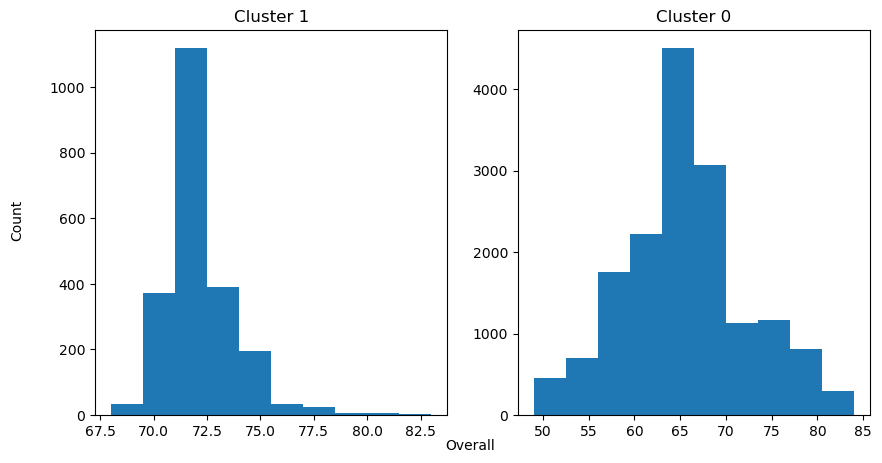

In [139]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster_H']==1]['overall'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster_H']==0]['overall'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Overall', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

## Finding the features that are highly correlated with our clusters

In [140]:
final_df2.corr()['Cluster_H'][:-2].sort_values()

team_position_RES          -0.095297
work_rate_Medium/Medium    -0.094591
jersey_number              -0.076033
team_position_SUB          -0.058286
nationality_England        -0.049778
                              ...   
overall                     0.316822
wage_eur                    0.369988
value_eur                   0.872354
international_reputation         NaN
weak_foot                        NaN
Name: Cluster_H, Length: 1584, dtype: float64

<Axes: xlabel='value_eur', ylabel='overall'>

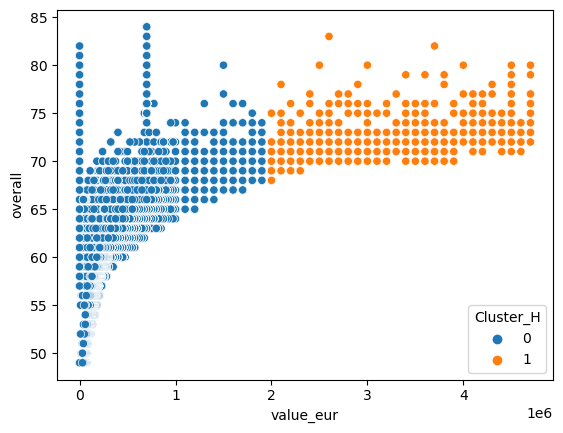

In [141]:
sns.scatterplot(data =final_df2, x= 'value_eur',y='overall',hue ='Cluster_H')

#### Here we see that both KMeans Clustering and Hierarchical clustering are giving us more or less similar results


# Task3:- Explore the data and attempt all the below asked questions in a step by step manner:

### Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

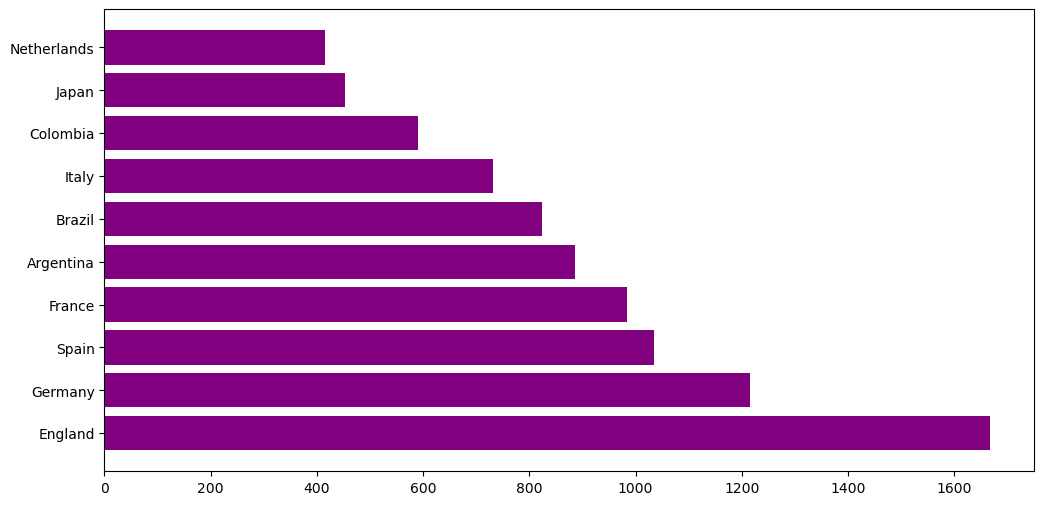

In [142]:
plt.figure(figsize = (12,6))
plt.barh(df["nationality"].value_counts()[:10].keys(),df["nationality"].value_counts()[:10],color = 'purple');

### Our Insights:

#### 1.Here we can clearly see in the graph that 'England' and 'Germany' are producing the most footballers

## Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

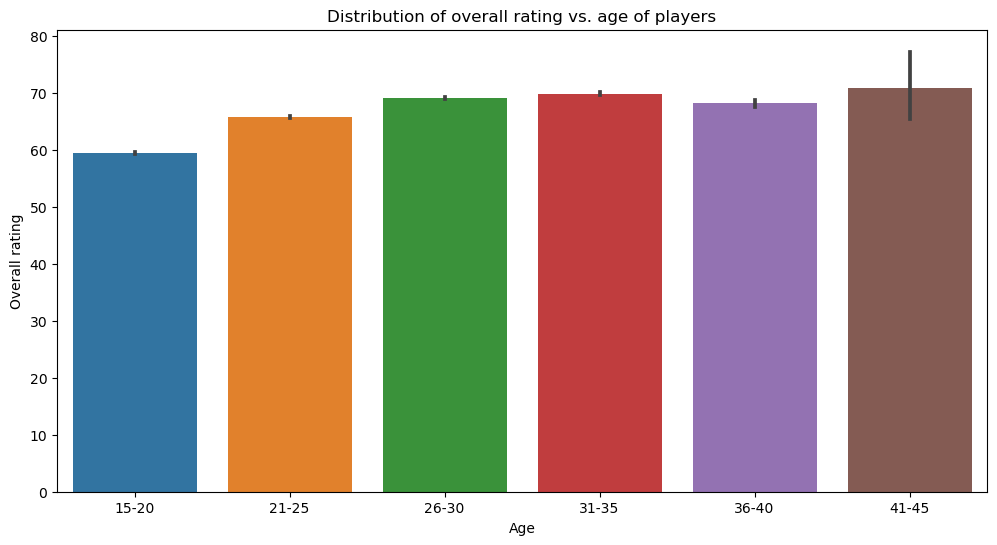

In [149]:
fifa_df = df
fifa_df = fifa_df.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
plt.figure(figsize = (12,6))
sns.barplot(data=fifa_df,x="Age Group", y="overall")
plt.xlabel("Age")
plt.ylabel("Overall rating")
plt.title("Distribution of overall rating vs. age of players")
plt.show()

### Our Insights:

#### 1.From the above graph we can conclude that after the age of 30-35 years of age the overall rating of the player tends to go down

## Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

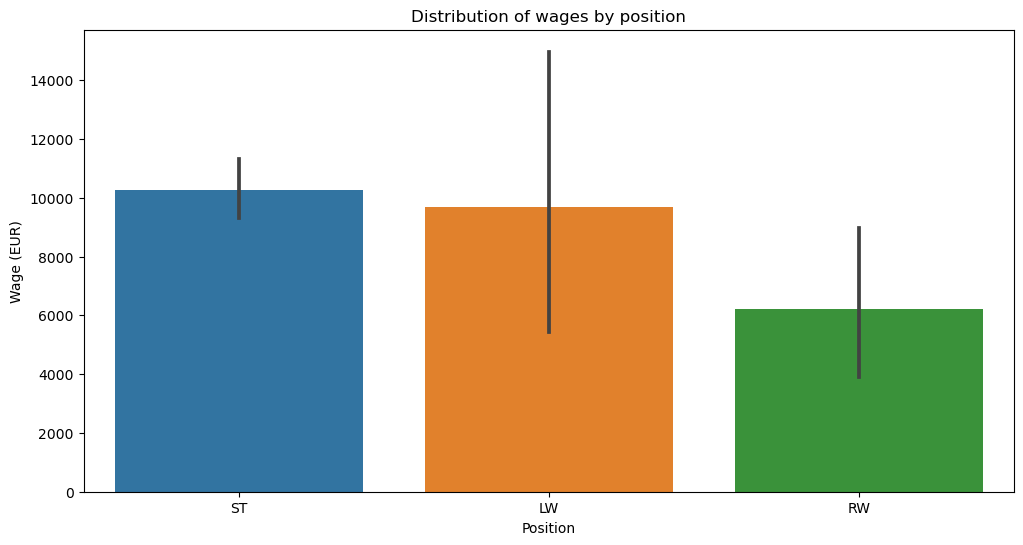

In [150]:
plt.figure(figsize = (12,6))

# Create a new column to store the position
forwards_df = fifa_df[(fifa_df["player_positions"] == 'LW') | (fifa_df["player_positions"] == 'RW')| (fifa_df["player_positions"] == 'ST')]

# Plot the distribution of wages for each position
sns.barplot(x="player_positions", y="wage_eur", data=forwards_df)
plt.xlabel("Position")
plt.ylabel("Wage (EUR)")
plt.title("Distribution of wages by position")
plt.show()

### Our Insights:

#### 1.From the barplot we can see that on an average the striker players are getting paid the most

# Model Comparison Report

#### 1.For our fifa20 dataset we have attempted to cluster similar types of players using KMeans clustering and hierarchical clustering. In both instances we have seen similar results.

#### 2.So we are suggesting KMeans Clustering with number of cluster = 2, is best for clustering this dataset.

# Report on Challenges faced
### The challenges we faced during this project are as follows:

#### 1.The fifa20 dataset is a huge dataset with 104 columns as such we needed to handle the features a bit differently; we splitted our dataset into numerical and categorical features and then we handled each feature.

#### 2.The dataset contained lots of extreme outliers in some features of the dataset which was giving us incorrect results; we had to handle these outliers by making a separate function and run the function on those features.

#### 3.In case of scaling the categorical data we used one hot encoding, as a result our features were increased to almost 1585. We had to do PCA to decrease these features into 732

# Conclusion
#### The fifa20 dataset is a challenging dataset where one has to do unsupervised machine learning; meaning there were no target or label in the dataset. Two main takeaways of this project is: clustering the players based on their features and finding the most important features to group these players on. As it is an unsupervised machine learning one has to do a lot of assumptions. In our case we also had to make a lot of assumptions but all of our assumptions were backed by facts and numbers. As we have seen that in order to cluster the players using KMeans; we selected number of cluster equal to 2, and this cluster number was selected by best score of elbow method, silhouettee score and Davis Bouldin score.

#### Using the clusters we have divided our dataset into 2 cluster and we assumed that players in cluster 1 were more likely to have greater potential to get picked to build an ideal team. We also found that the players' value in euro is highly correlated with these clusters; so we grouped players that have greater value in euro and overall rating and based on their positions we tried to form a team which can be formed with the minimum budget.

#### Our overall suggestion for clustering this dataset is using KMeans Clustering with number of cluster = 2

#### To build an ideal team the minimum budget should be 51,100,000.00+